# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.58 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('9986b353.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-04-27T11:03:52.947928Z   
1  2020-04-27T11:03:52.957219Z   
2  2020-04-27T11:03:52.966512Z   
3  2020-04-27T11:03:52.975727Z   
4  2020-04-27T11:03:52.985122Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 1531, 'deaths': 50, 'recovered': 0}   
1   {'confirmed': 726, 'deaths': 28, 'recovered': 0}   
2  {'confirmed': 3382, 'deaths': 425, 'recovered'...   
3   {'confirmed': 738, 'deaths': 40, 'recovered': 0}   
4     {'confirmed': 26, 'deaths': 2, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 1531, 'timeline': {'2...  
1  {'confirmed': {'latest': 726, 'timeline': {'20...  
2  {'confirmed': {'latest': 3382, 'timeline': {'2...  
3  {'confirmed': {'latest': 738, 'timeline': {'20...  
4  {'confirmed': {'latest': 26, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
91      10694     238       NaN                     0.102967   
92      10708     240       NaN                     0.130915   
93      10718     240       NaN                     0.093388   
94      10728     242       NaN                     0.093301   
95      10738     243       NaN                     0.093214   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
91                                         283.943678                 
92                                         361.011139                 
93                                         257.527958                 
94                                         257.287682                 
95                                         257.047854                 

    deaths_percentage_change  \
91                  0.421941   
92                  0.840336   
93                  0.840336   
94                  0.833333   
95                  0.413223   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
91                                        1163.548259           
92                                        2317.318803           
93                                        2317.318803           
94                                        2298.007812           
95                                        1139.508006           

    confirmed_new_cases  deaths_new_cases  
91                 11.0               1.0  
92                 14.0               2.0  
93                 10.0               2.0  
94                 10.0               2.0  
95                 10.0               1.0

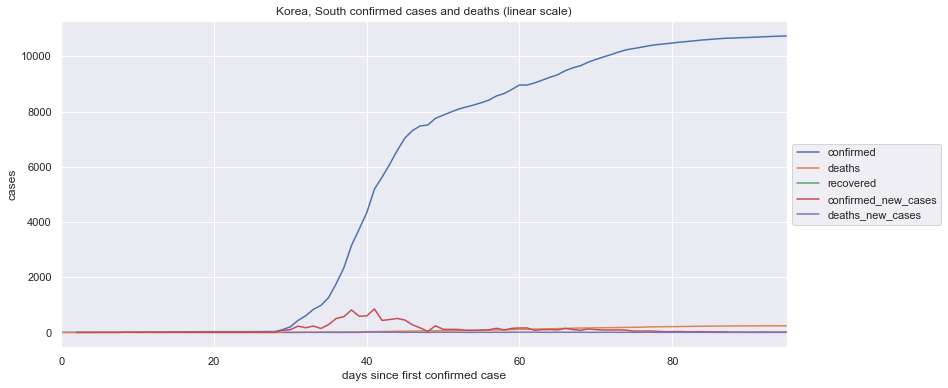

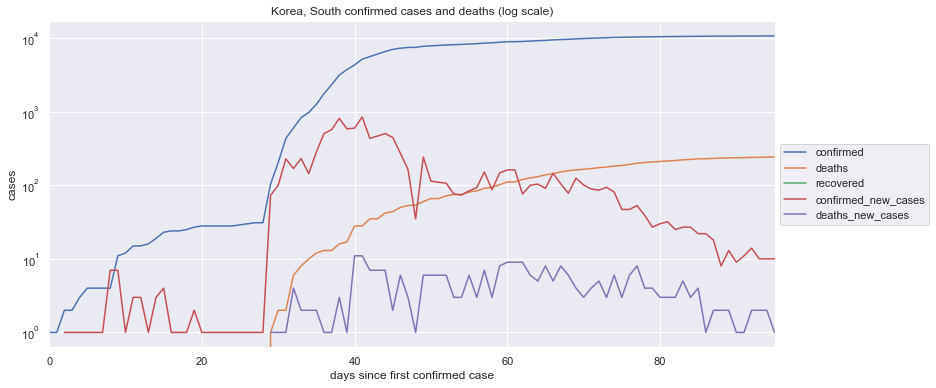

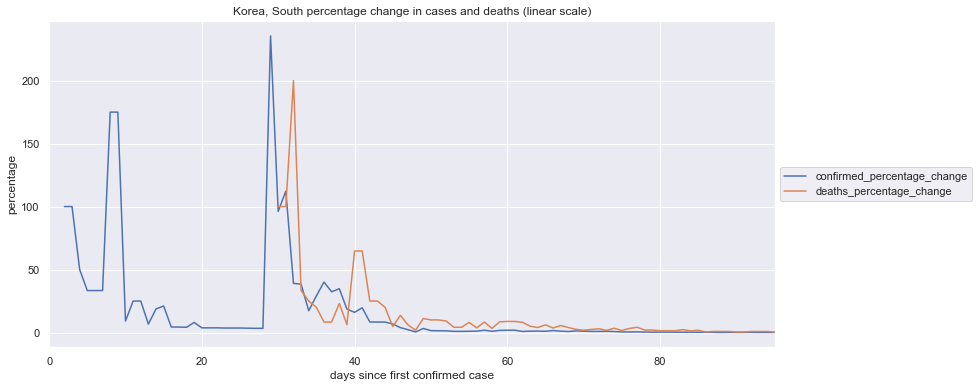

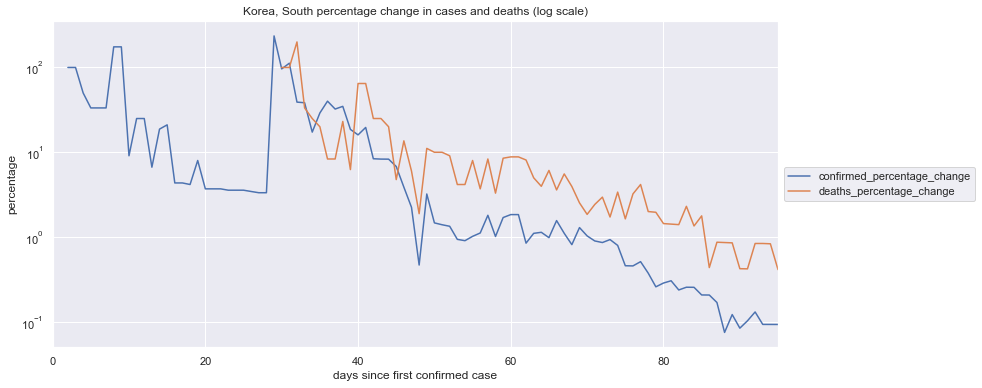

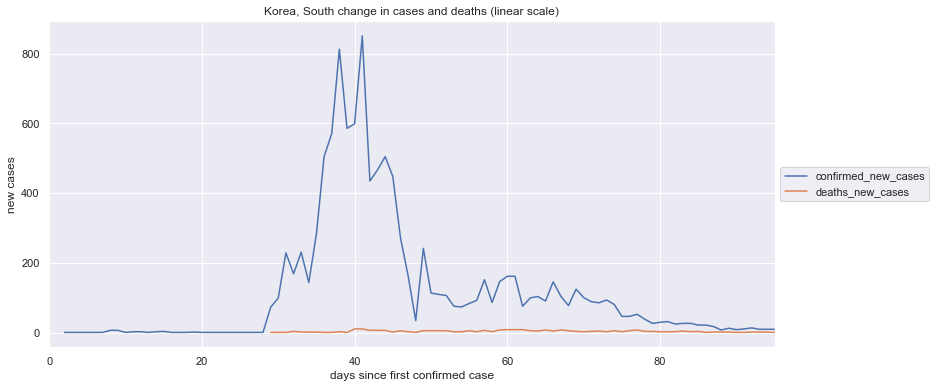

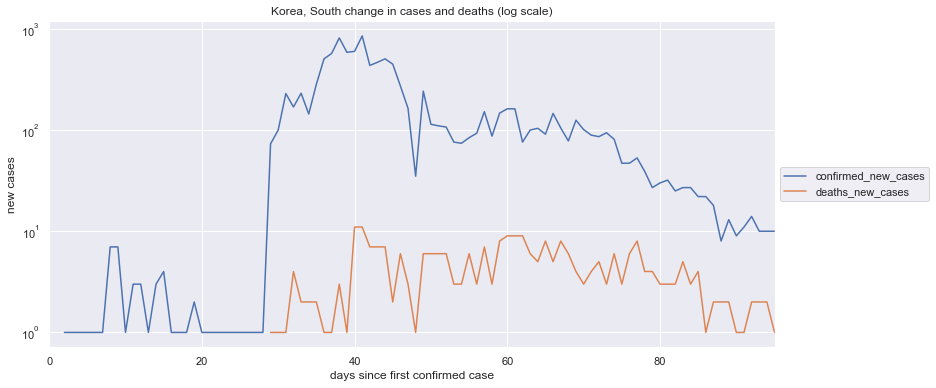

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
78      41889    6262       NaN                     2.278054   
79      42797    6490       NaN                     2.167634   
80      44293    6679       NaN                     3.495572   
81      45325    6917       NaN                     2.329939   
82      46134    7094       NaN                     1.784887   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
78                                       10586.415872                 
79                                       10073.275154                 
80                                       16244.378792                 
81                                       10827.531156                 
82                                        8294.601960                 

    deaths_percentage_change  \
78                  4.401467   
79                  3.641009   
80                  2.912173   
81                  3.563408   
82                  2.558913   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
78                                       20454.190980           
79                                       16920.244131           
80                                       13533.245137           
81                                       16559.619548           
82                                       11891.601082           

    confirmed_new_cases  deaths_new_cases  
78                933.0             264.0  
79                908.0             228.0  
80               1496.0             189.0  
81               1032.0             238.0  
82                809.0             177.0

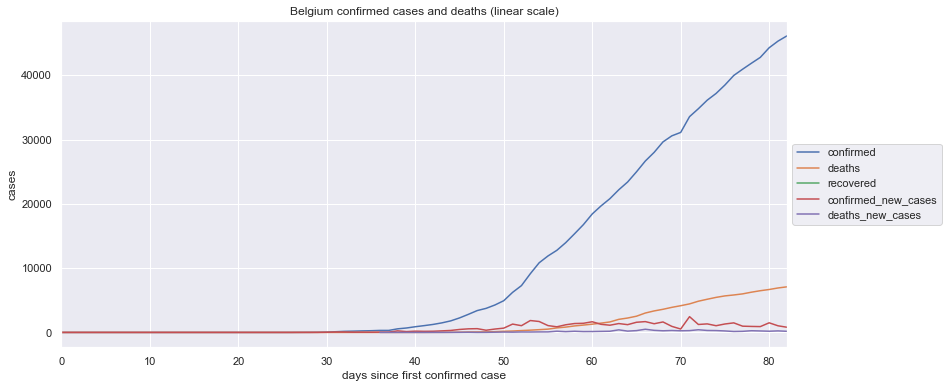

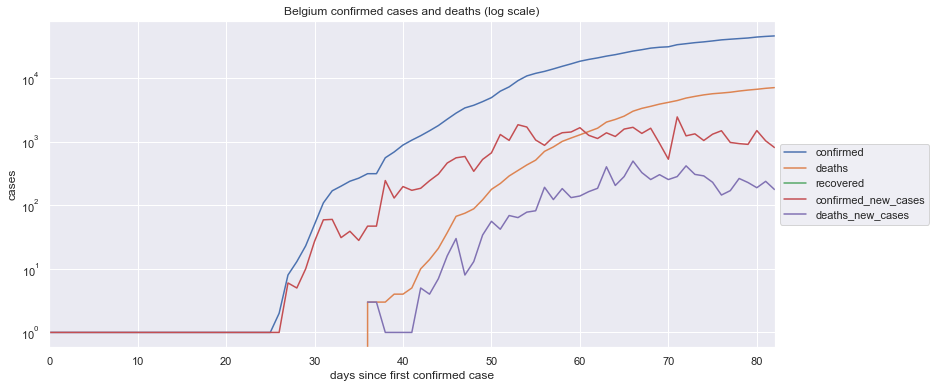

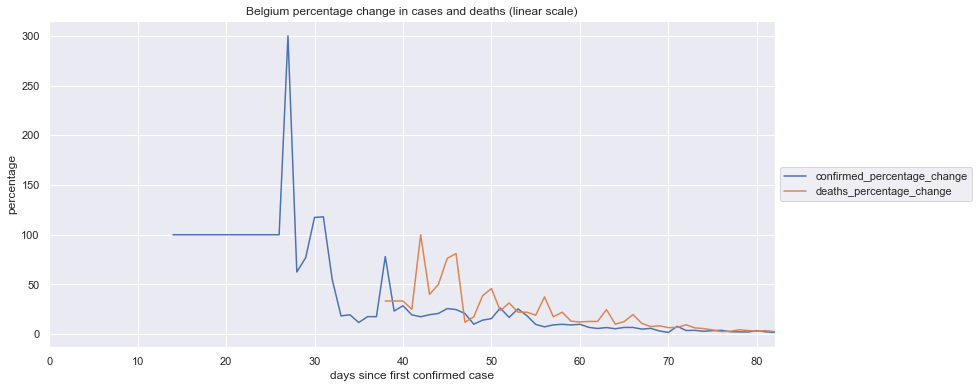

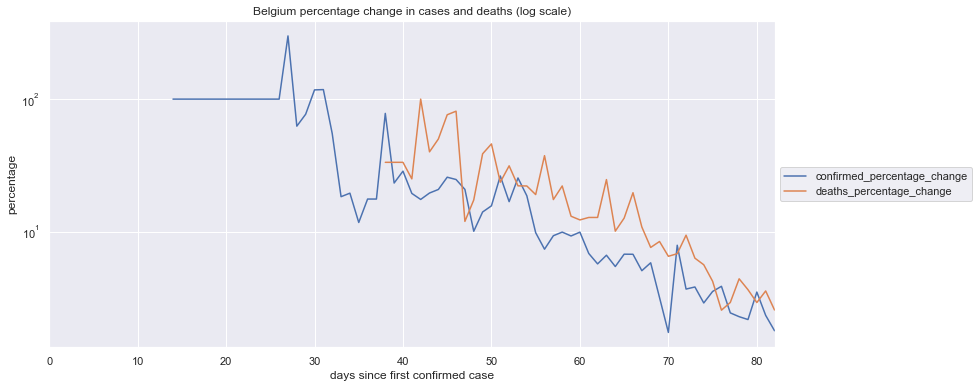

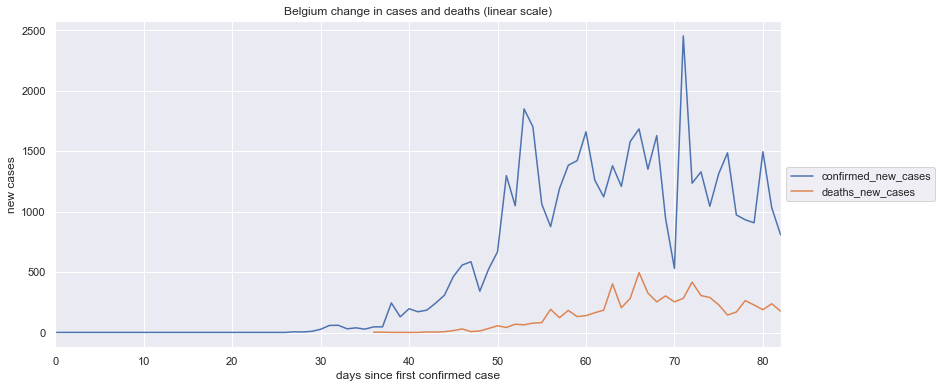

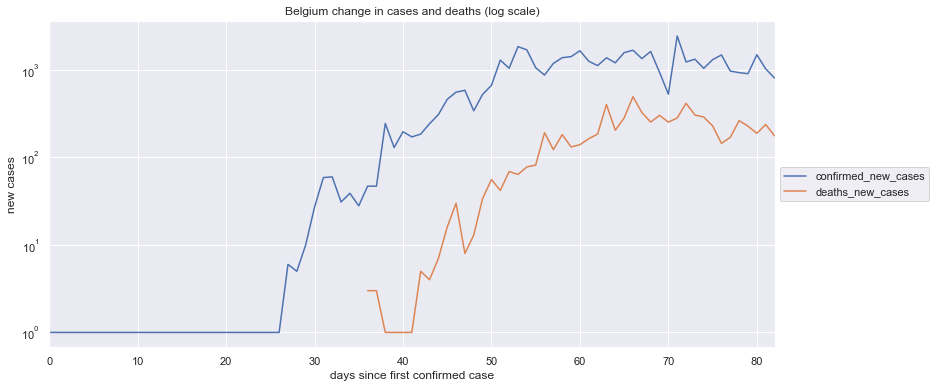

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
57      28268    1509       NaN                     0.730499   
58      28496    1549       NaN                     0.806566   
59      28677    1589       NaN                     0.635177   
60      28894    1599       NaN                     0.756704   
61      29061    1610       NaN                     0.577975   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
57                                        3064.954114                 
58                                        3384.106145                 
59                                        2665.010257                 
60                                        3174.901307                 
61                                        2425.007102                 

    deaths_percentage_change  \
57                  2.097429   
58                  2.650762   
59                  2.582311   
60                  0.629327   
61                  0.687930   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
57                                        8800.178310           
58                                       11121.796996           
59                                       10834.597590           
60                                        2640.464391           
61                                        2886.346284           

    confirmed_new_cases  deaths_new_cases  
57                205.0              31.0  
58                228.0              40.0  
59                181.0              40.0  
60                217.0              10.0  
61                167.0              11.0

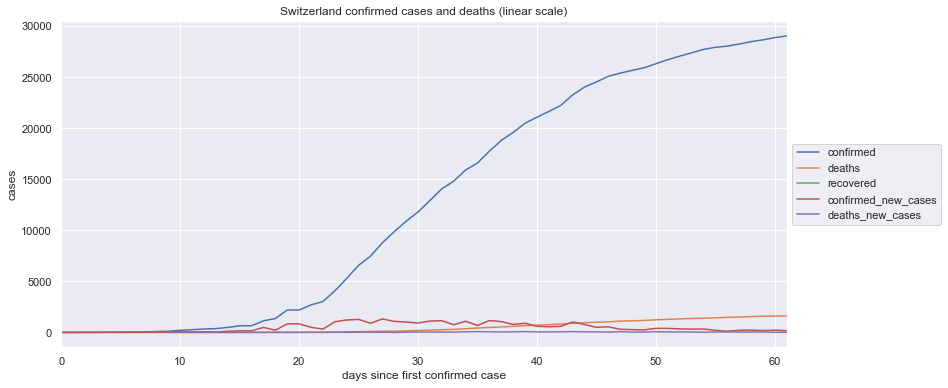

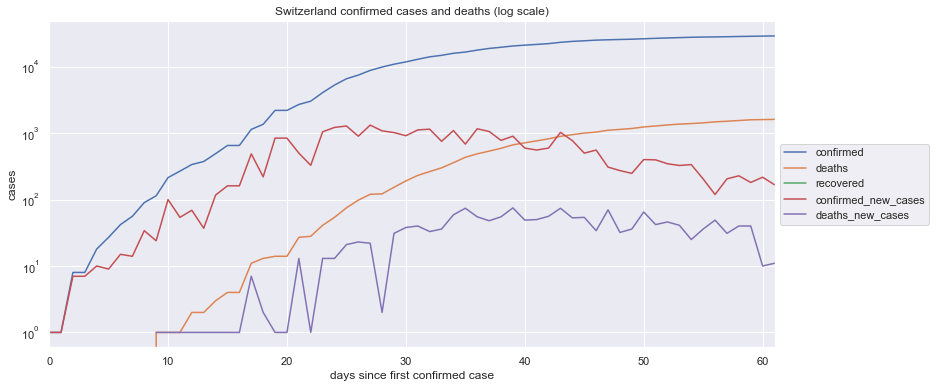

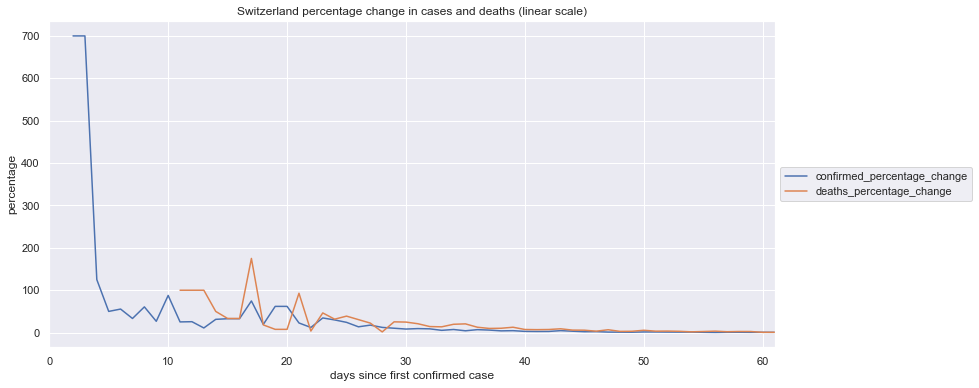

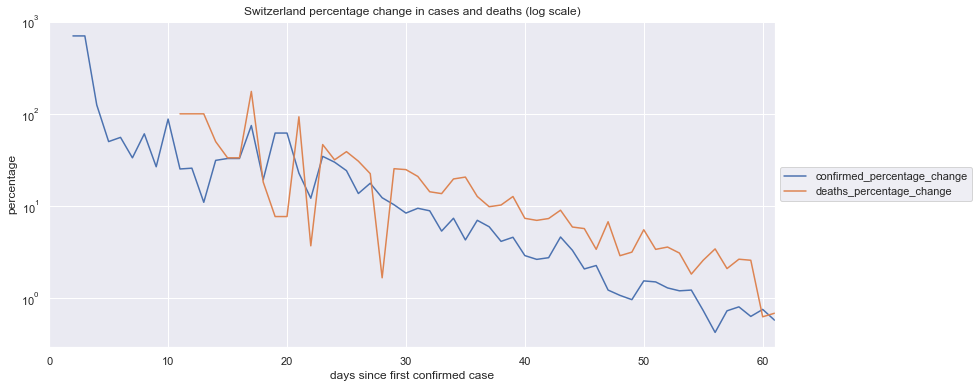

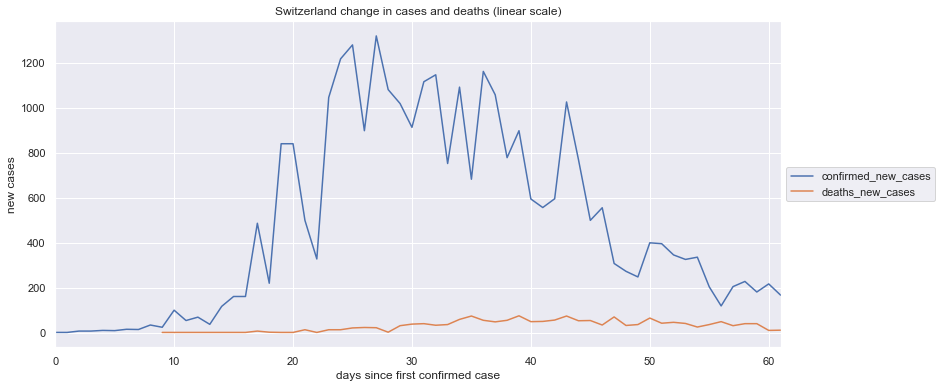

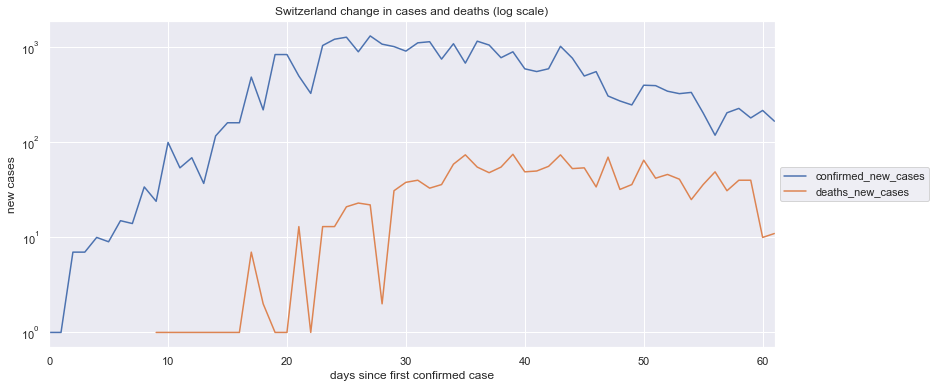

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
56       2408     121       NaN                     0.291545   
57       2463     125       NaN                     2.284053   
58       2490     130       NaN                     1.096224   
59       2506     130       NaN                     0.642570   
60       2517     134       NaN                     0.438947   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
56                                         102.434099                 
57                                         802.499697                 
58                                         385.157202                 
59                                         225.766399                 
60                                         154.223405                 

    deaths_percentage_change  \
56                  4.310345   
57                  3.305785   
58                  4.000000   
59                  4.000000   
60                  3.076923   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
56                                        1514.435165           
57                                        1161.484160           
58                                        1405.395833           
59                                        1405.395833           
60                                        1081.073718           

    confirmed_new_cases  deaths_new_cases  
56                  7.0               5.0  
57                 55.0               4.0  
58                 27.0               5.0  
59                 16.0               5.0  
60                 11.0               4.0

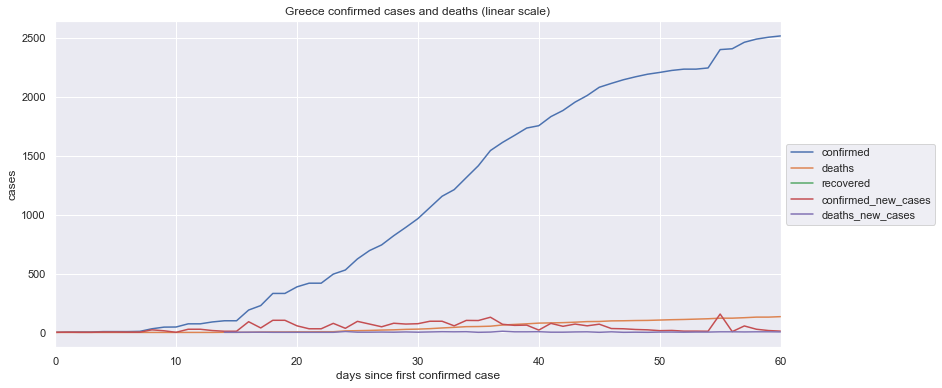

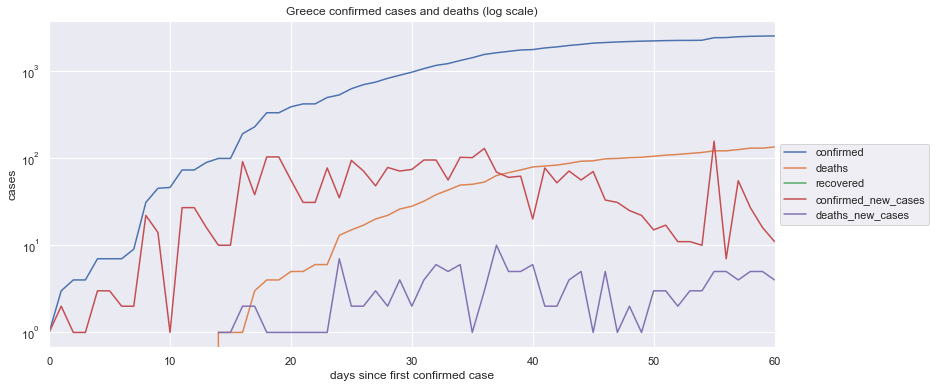

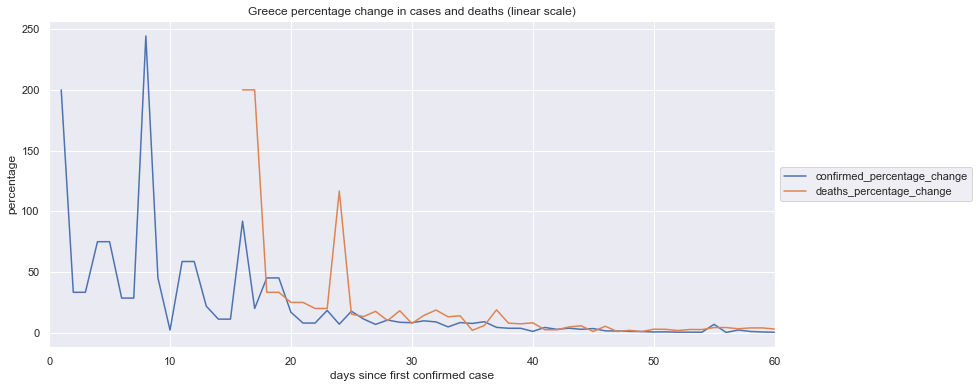

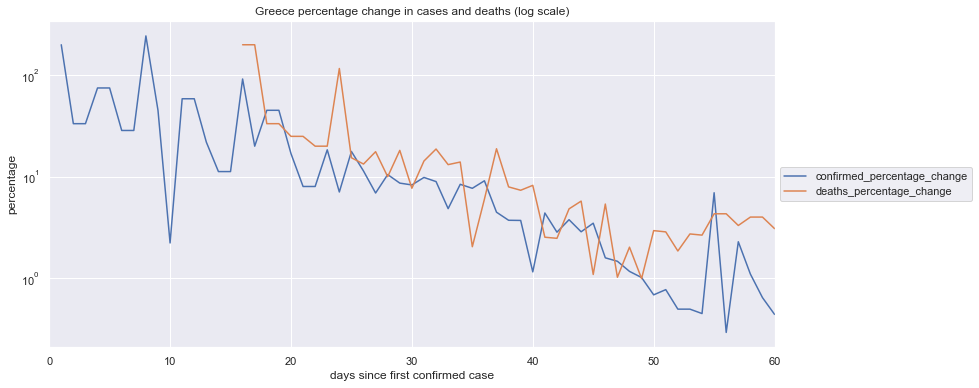

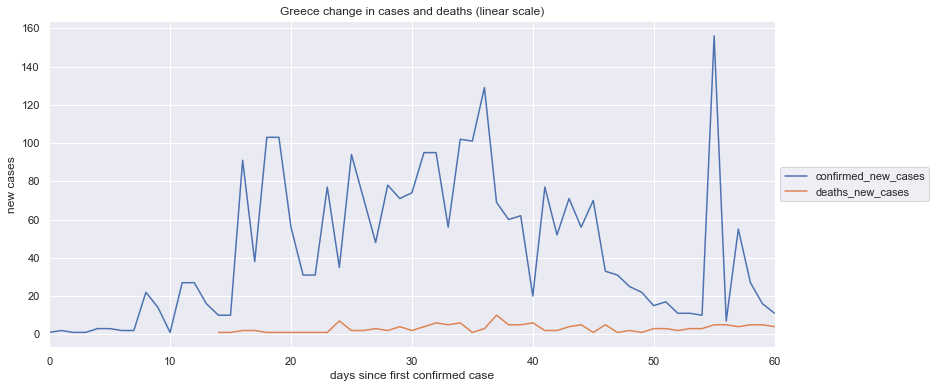

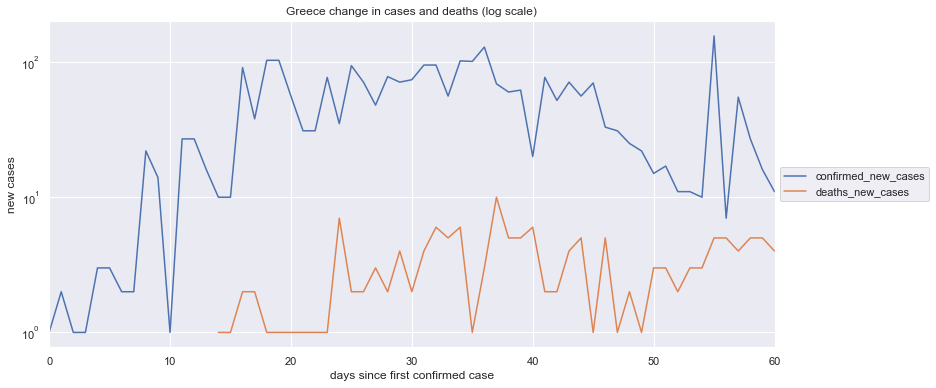

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
56       7338     187       NaN                     2.044222   
57       7401     194       NaN                     0.858545   
58       7463     199       NaN                     0.837725   
59       7499     201       NaN                     0.482380   
60       7527     201       NaN                     0.373383   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
56                                        2353.751217                 
57                                         988.542518                 
58                                         964.570103                 
59                                         555.420072                 
60                                         429.919545                 

    deaths_percentage_change  \
56                  2.747253   
57                  3.743316   
58                  2.577320   
59                  1.005025   
60                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
56                                        3163.232601           
57                                        4310.115865           
58                                        2967.568729           
59                                        1157.202680           
60                                                NaN           

    confirmed_new_cases  deaths_new_cases  
56                147.0               5.0  
57                 63.0               7.0  
58                 62.0               5.0  
59                 36.0               2.0  
60                 28.0               NaN

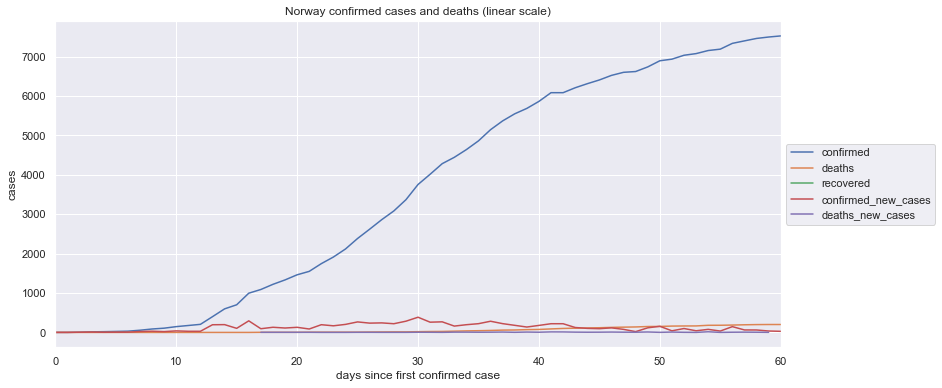

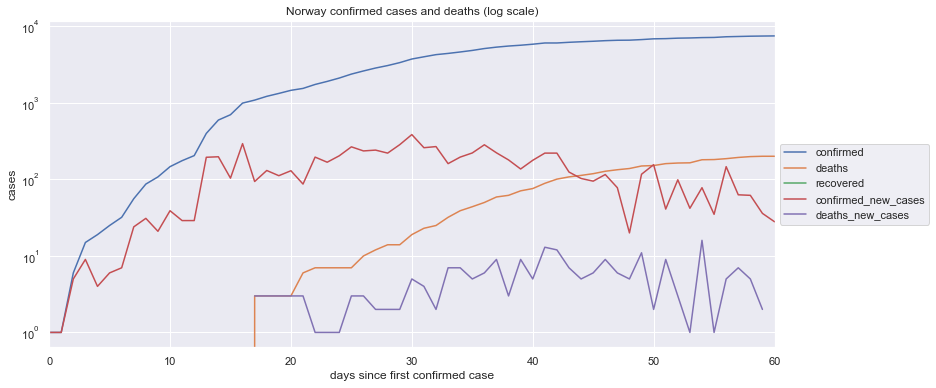

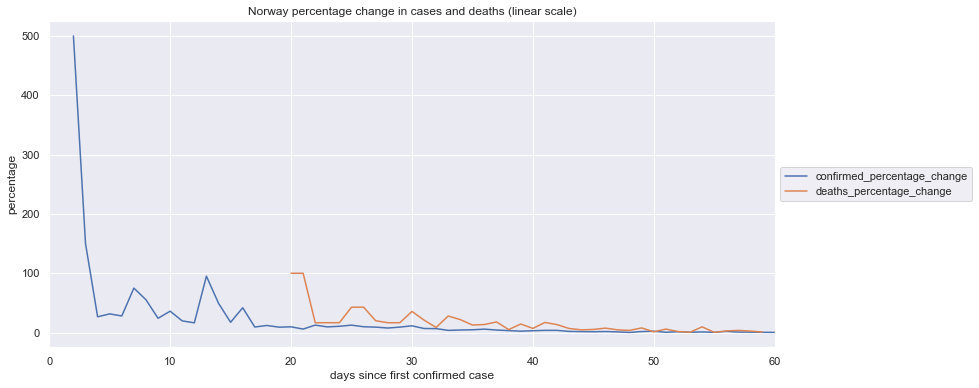

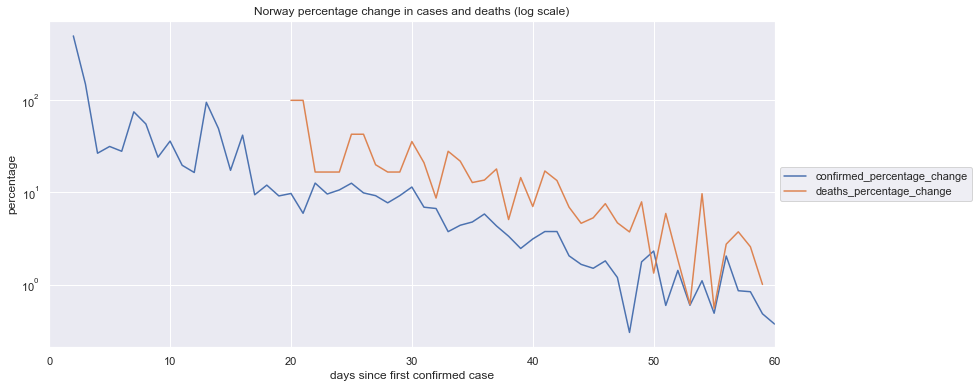

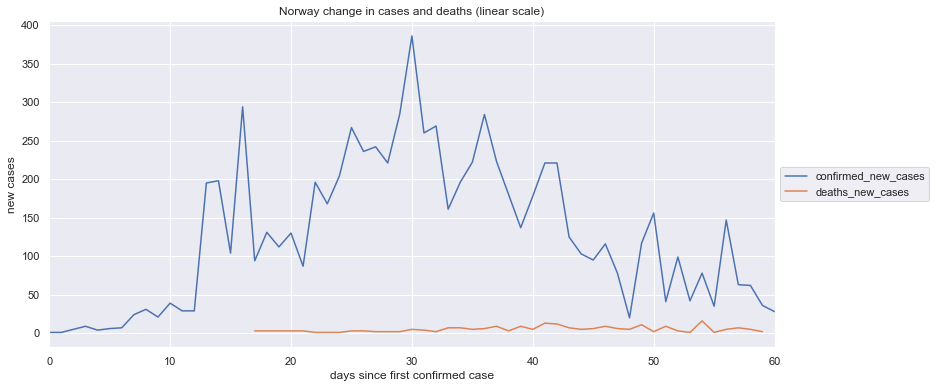

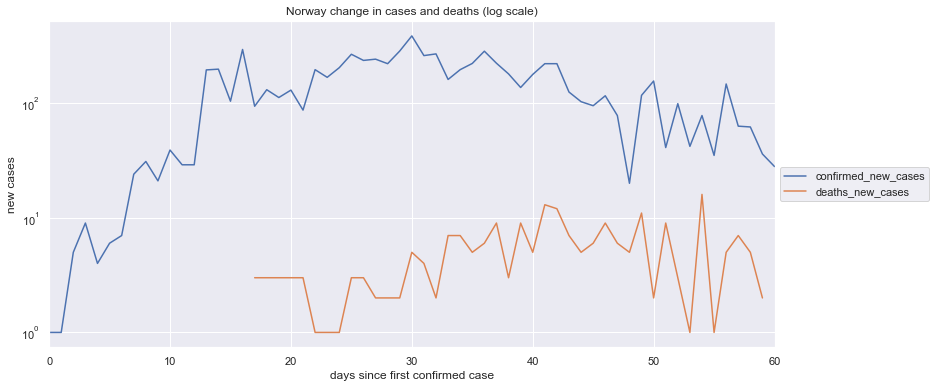

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
57      14925     510       NaN                     0.349627   
58      15002     522       NaN                     0.515913   
59      15071     530       NaN                     0.459939   
60      15148     536       NaN                     0.510915   
61      15225     542       NaN                     0.508318   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
57                                         802.280699                 
58                                        1183.853504                 
59                                        1055.410737                 
60                                        1172.384947                 
61                                        1166.425504                 

    deaths_percentage_change  \
57                  3.869654   
58                  2.352941   
59                  1.532567   
60                  1.132075   
61                  1.119403   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
57                                        8879.605821           
58                                        5399.240196           
59                                        3516.746488           
60                                        2597.747642           
61                                        2568.668377           

    confirmed_new_cases  deaths_new_cases  
57                 52.0              19.0  
58                 77.0              12.0  
59                 69.0               8.0  
60                 77.0               6.0  
61                 77.0               6.0

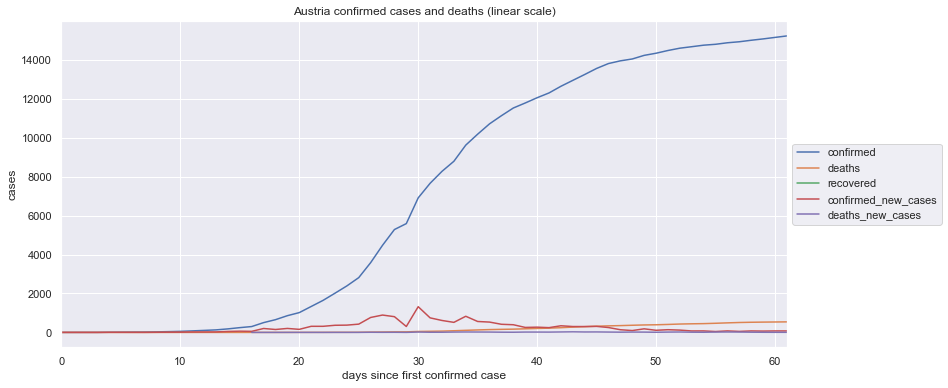

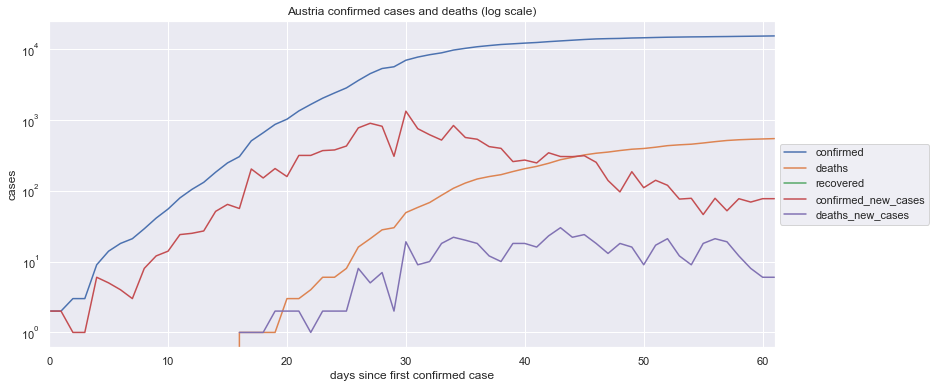

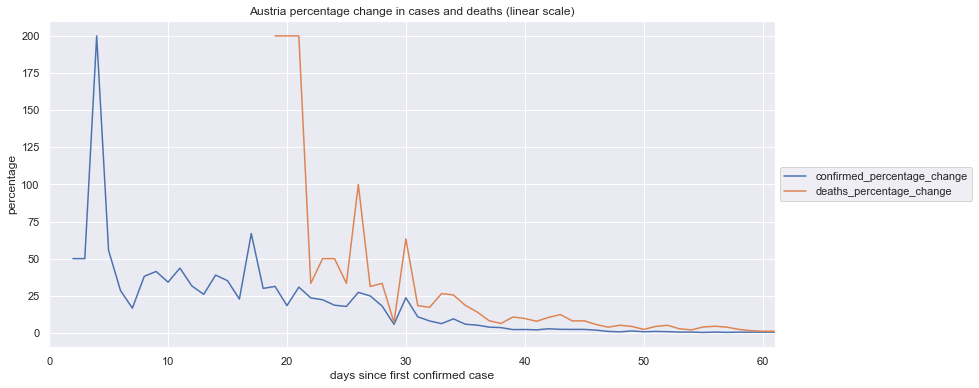

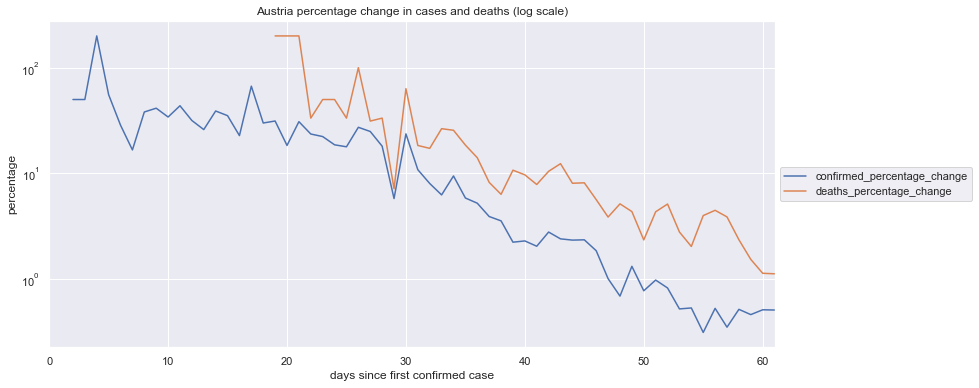

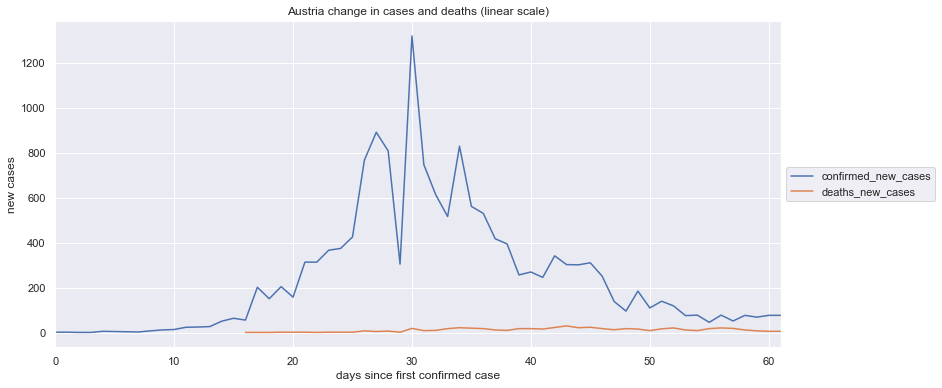

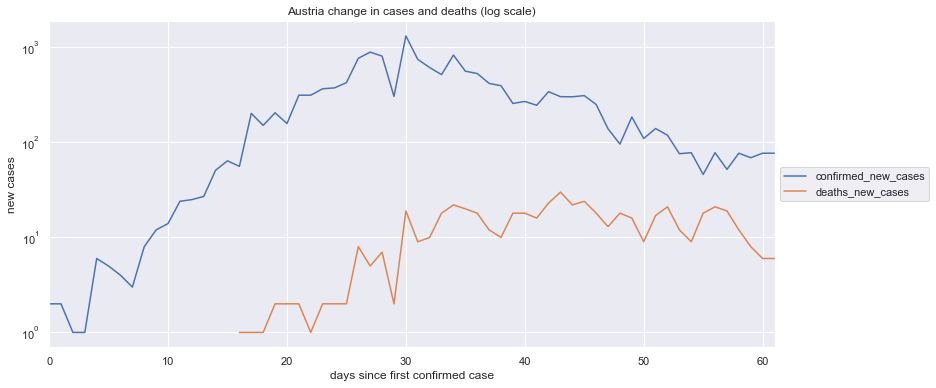

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
82      16004    1937       NaN                     4.451116   
83      16755    2021       NaN                     4.692577   
84      17567    2152       NaN                     4.846315   
85      18177    2192       NaN                     3.472420   
86      18640    2194       NaN                     2.547175   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
82                                        7931.865604                 
83                                        8362.147517                 
84                                        8636.107257                 
85                                        6187.834137                 
86                                        4539.052586                 

    deaths_percentage_change  \
82                  9.745042   
83                  4.336603   
84                  6.481940   
85                  1.858736   
86                  0.091241   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
82                                       17365.614967           
83                                        7727.803949           
84                                       11550.782667           
85                                        3312.257977           
86                                         162.590766           

    confirmed_new_cases  deaths_new_cases  
82                682.0             172.0  
83                751.0              84.0  
84                812.0             131.0  
85                610.0              40.0  
86                463.0               2.0

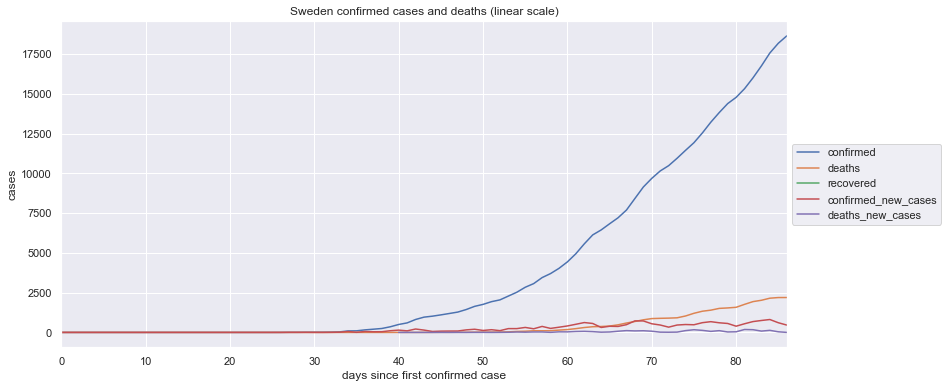

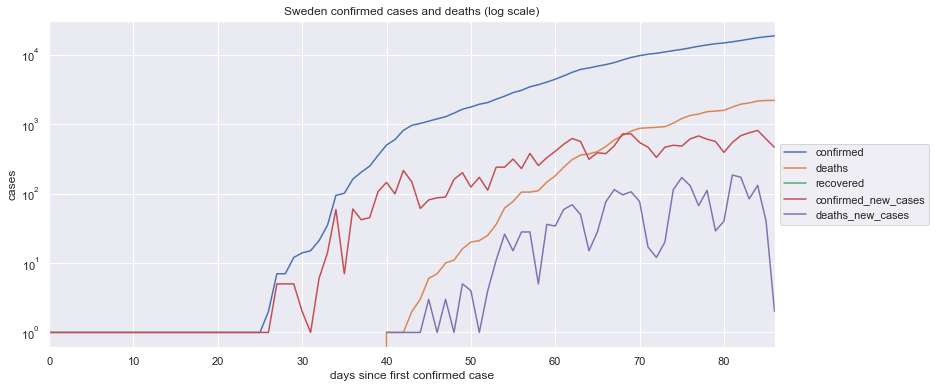

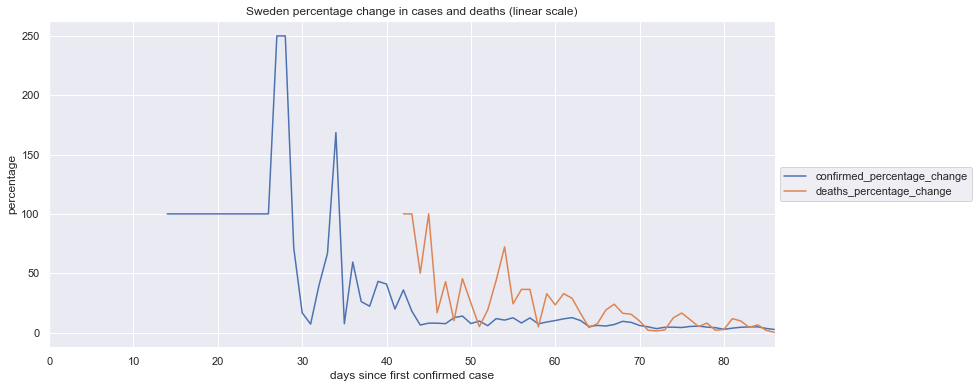

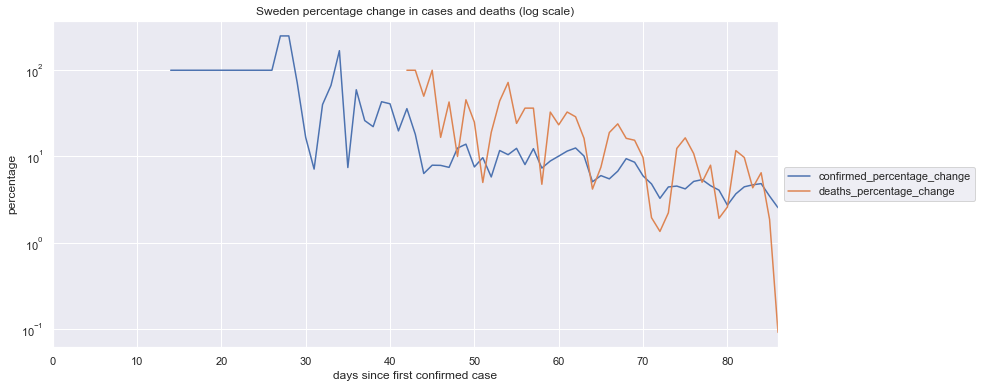

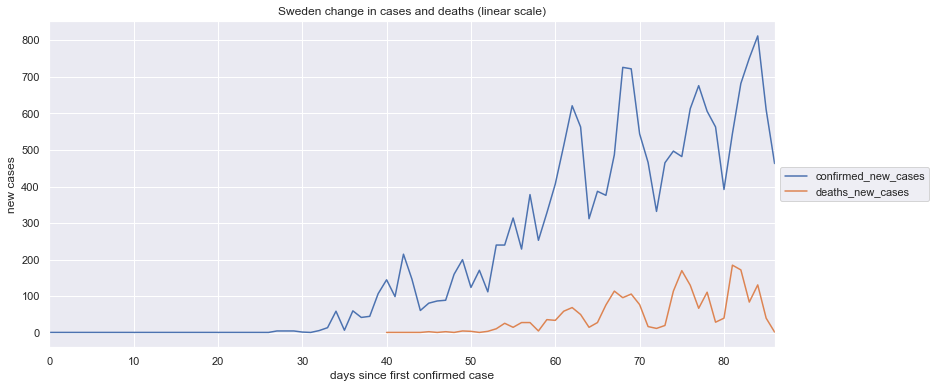

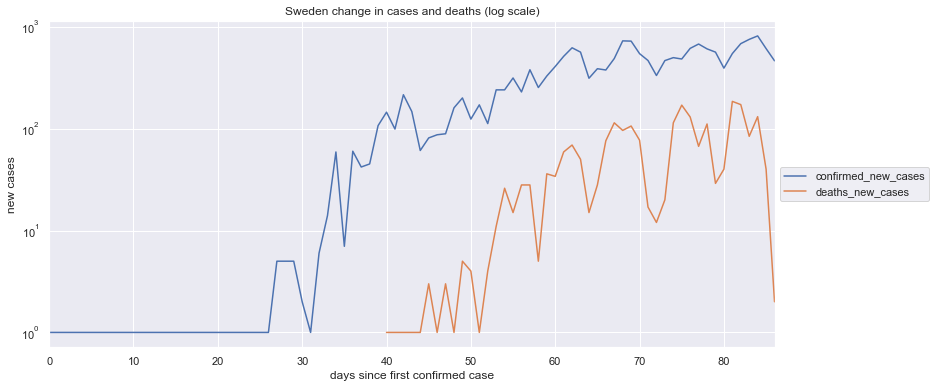

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
53      16671     769       NaN                     3.933915   
54      17607     794       NaN                     5.614540   
55      18184    1014       NaN                     3.277106   
56      18561    1063       NaN                     2.073251   
57      19262    1087       NaN                     3.776736   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
53                                        6326.616694                 
54                                        9029.438096                 
55                                        5270.319895                 
56                                        3334.252267                 
57                                        6073.837588                 

    deaths_percentage_change  \
53                  5.342466   
54                  3.250975   
55                 27.707809   
56                  4.832347   
57                  2.257761   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
53                                        8591.881421           
54                                        5228.296353           
55                                       44560.361566           
56                                        7771.496446           
57                                        3630.985419           

    confirmed_new_cases  deaths_new_cases  
53                631.0              39.0  
54                936.0              25.0  
55                577.0             220.0  
56                377.0              49.0  
57                701.0              24.0

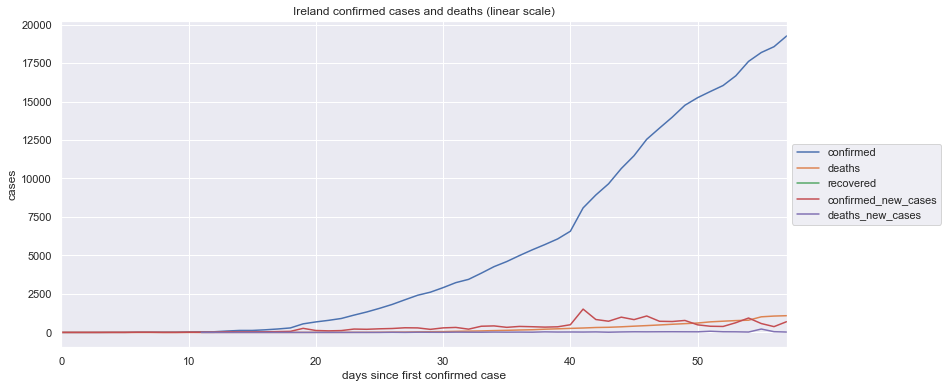

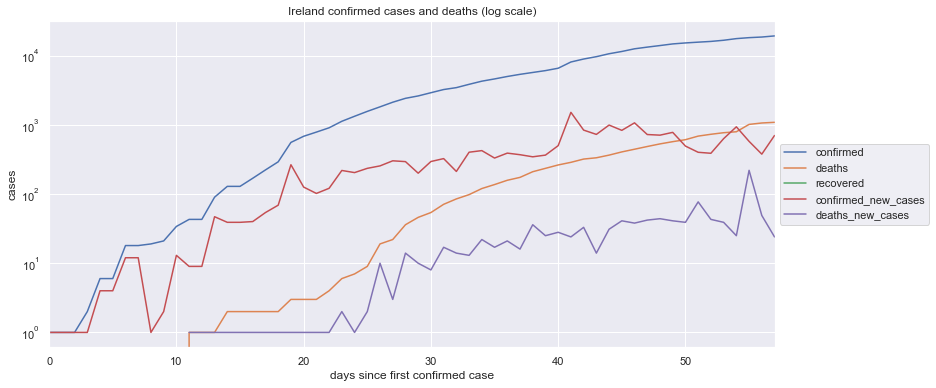

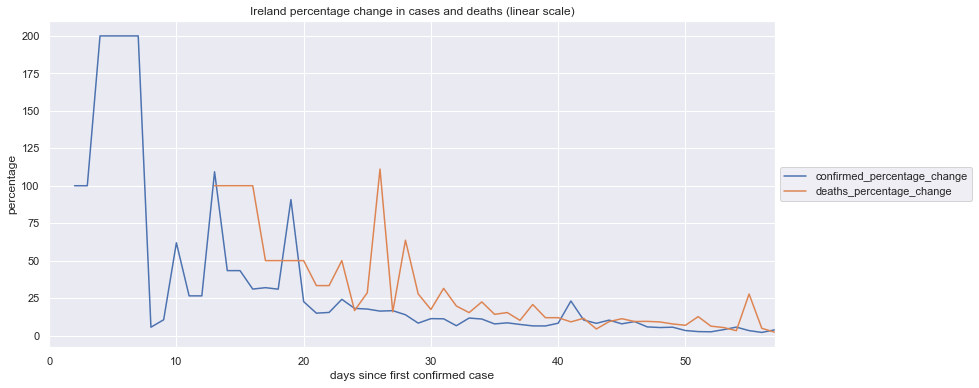

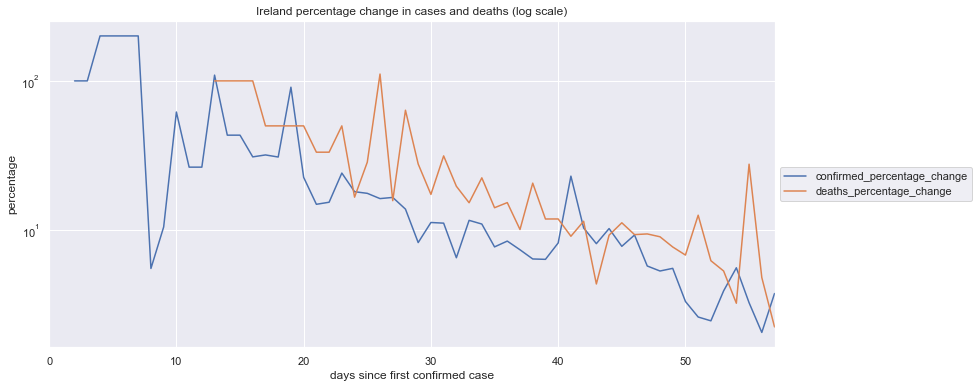

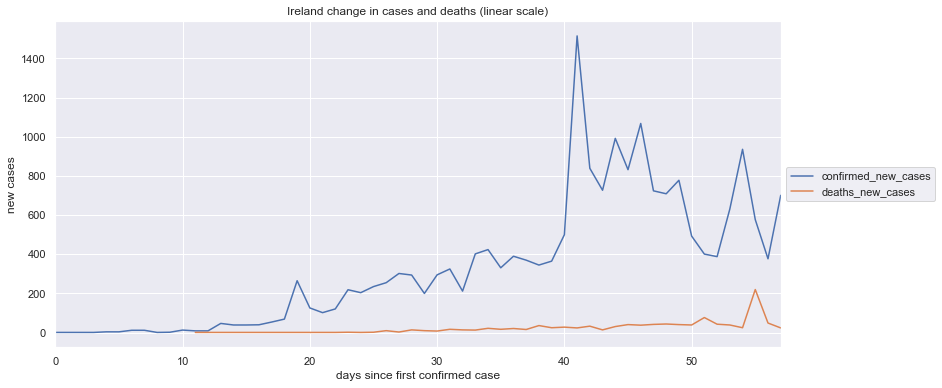

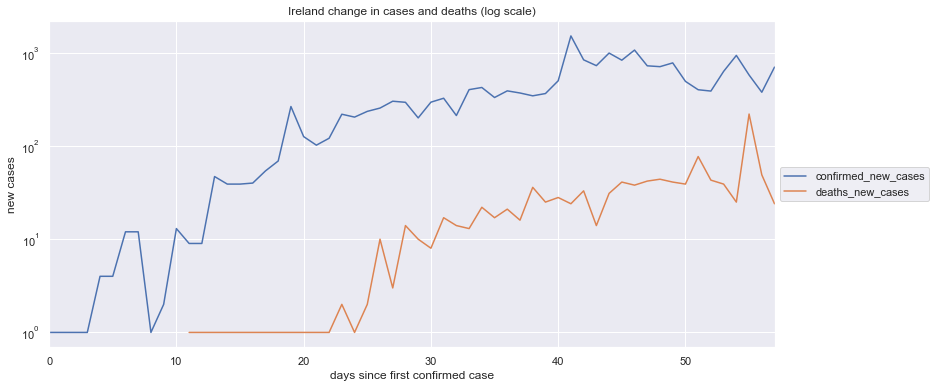

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
82     133495   18100       NaN                     3.449211   
83     138078   18738       NaN                     3.433087   
84     143464   19506       NaN                     3.900694   
85     148377   20319       NaN                     3.424553   
86     152840   20732       NaN                     3.007879   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
82                                       45299.531612                 
83                                       45087.773660                 
84                                       51228.990151                 
85                                       44975.682496                 
86                                       39503.378015                 

    deaths_percentage_change  \
82                  4.400992   
83                  3.524862   
84                  4.098623   
85                  4.167948   
86                  2.032580   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
82                                       57799.558687           
83                                       46293.075852           
84                                       53828.455545           
85                                       54738.924401           
86                                       26694.491660           

    confirmed_new_cases  deaths_new_cases  
82               4451.0             763.0  
83               4583.0             638.0  
84               5386.0             768.0  
85               4913.0             813.0  
86               4463.0             413.0

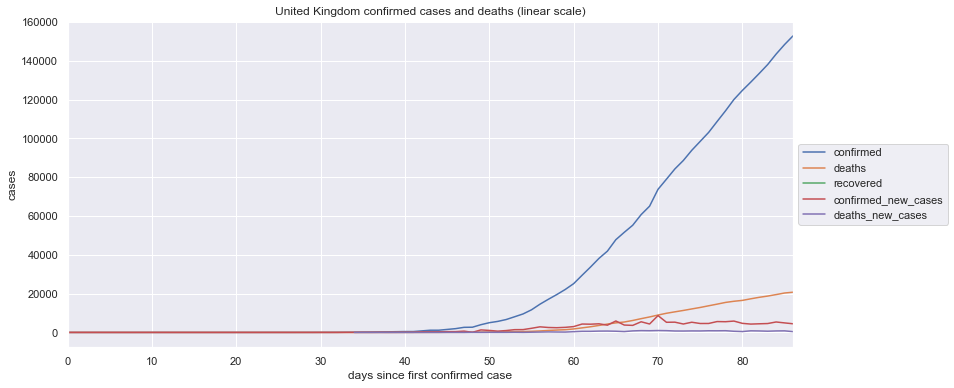

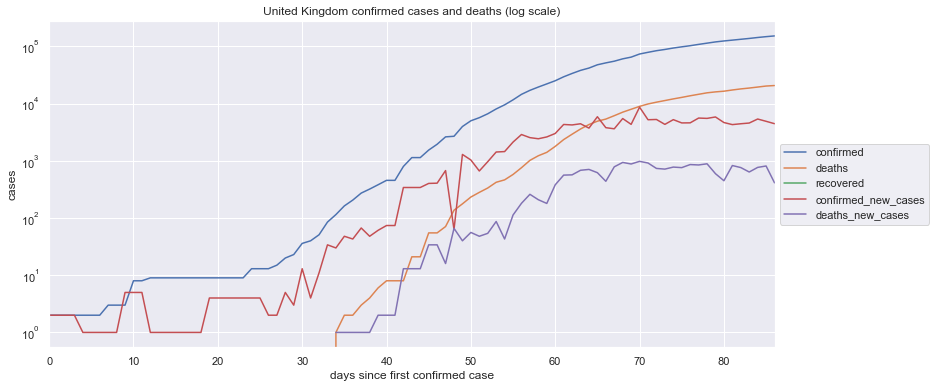

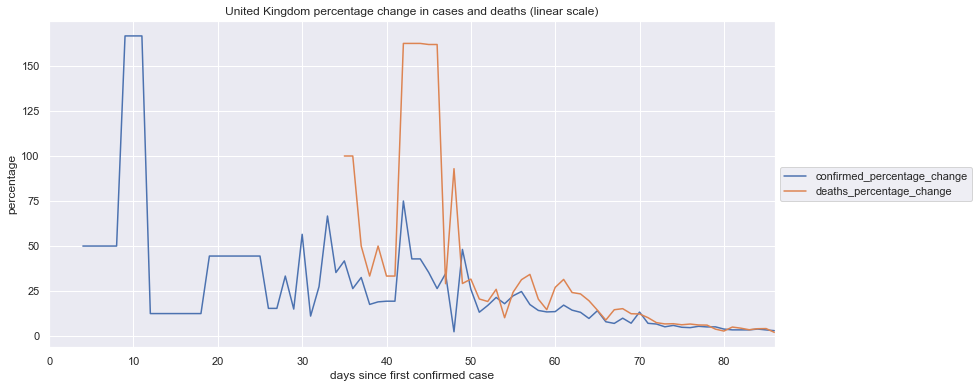

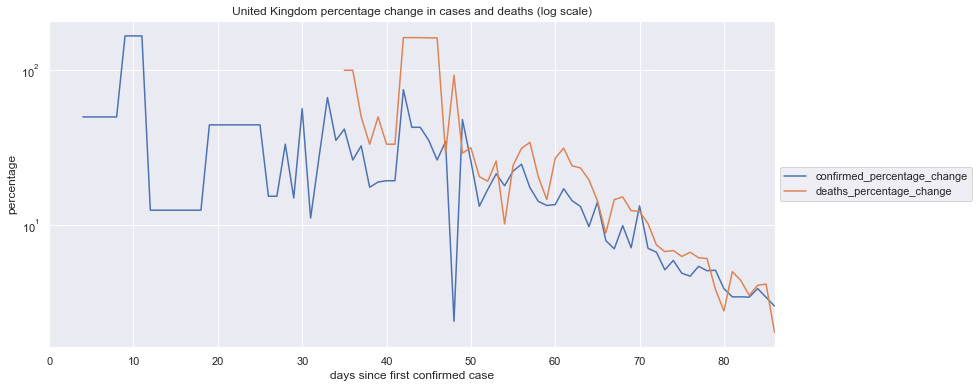

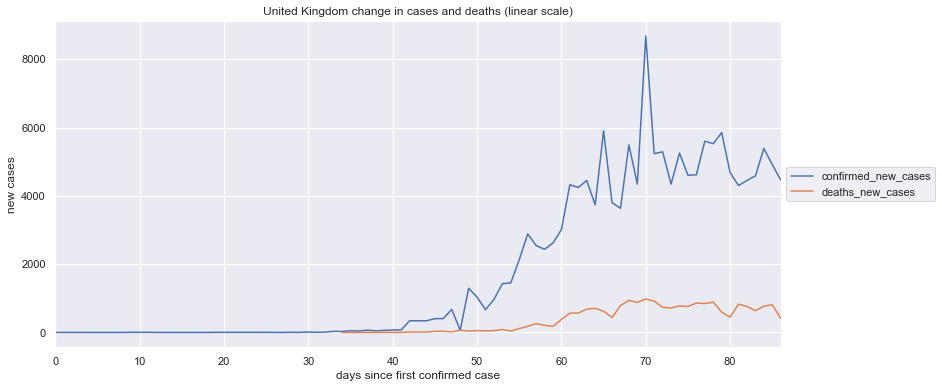

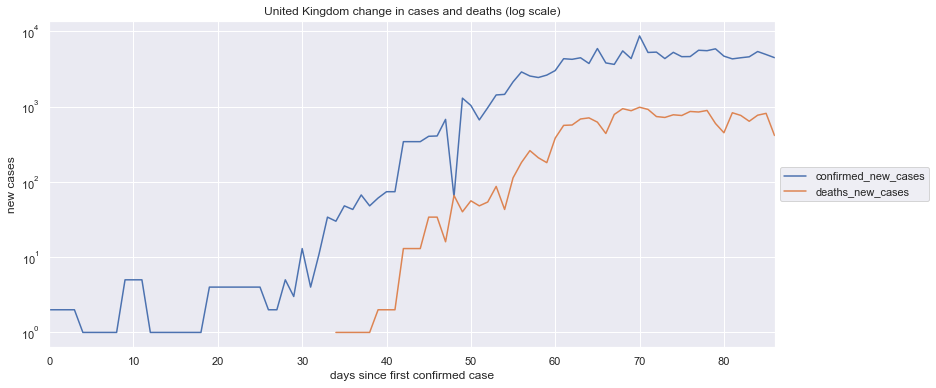

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
86     150648    5279       NaN                     1.589442   
87     153129    5575       NaN                     1.646885   
88     154999    5760       NaN                     1.221193   
89     156513    5877       NaN                     0.976780   
90     157770    5976       NaN                     0.803128   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
86                                       32190.057630                 
87                                       33353.419011                 
88                                       24732.107508                 
89                                       19782.170671                 
90                                       16265.290613                 

    deaths_percentage_change  \
86                  4.887741   
87                  5.607123   
88                  3.318386   
89                  2.031250   
90                  1.684533   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
86                                       98988.590925           
87                                      113557.811612           
88                                       67205.346132           
89                                       41137.731934           
90                                       34115.871459           

    confirmed_new_cases  deaths_new_cases  
86               2357.0             246.0  
87               2481.0             296.0  
88               1870.0             185.0  
89               1514.0             117.0  
90               1257.0              99.0

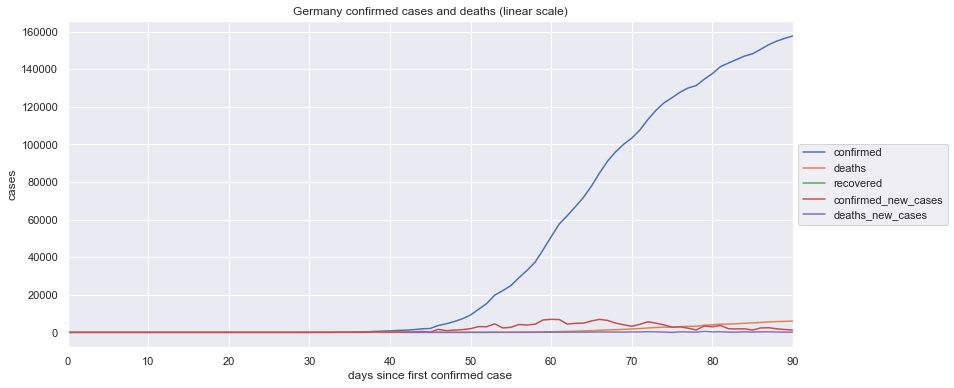

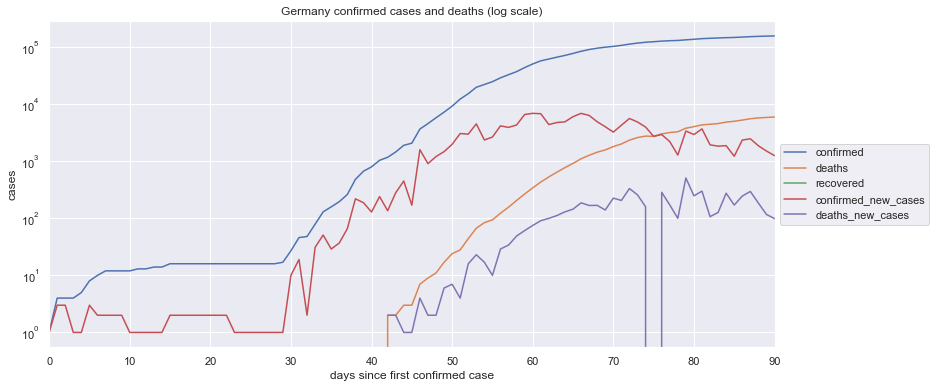

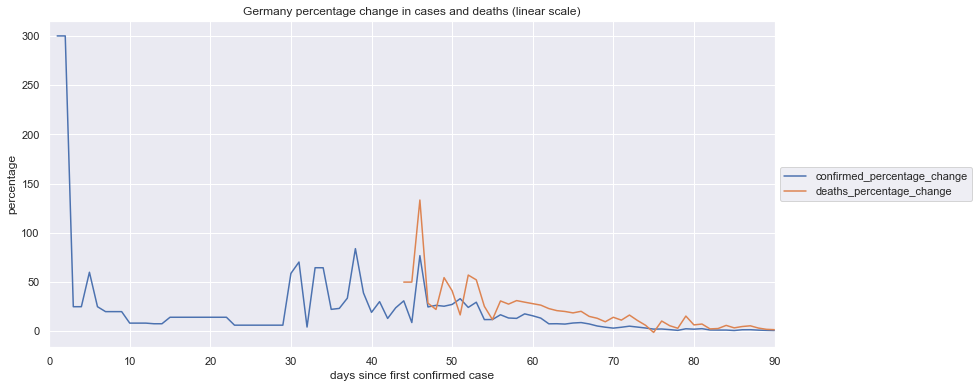

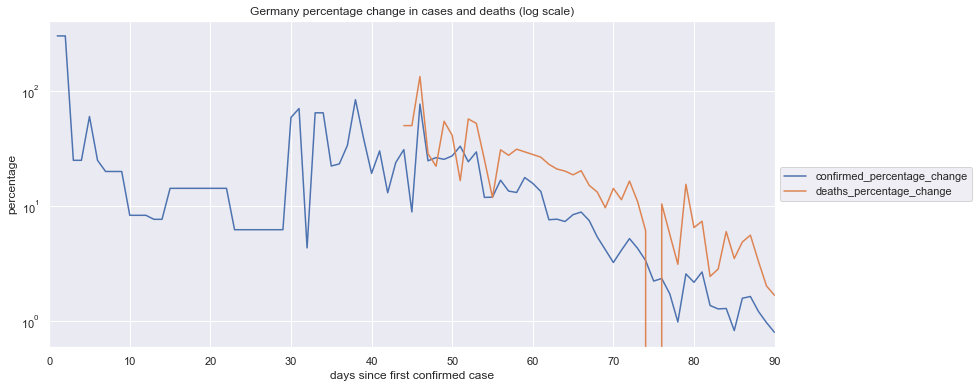

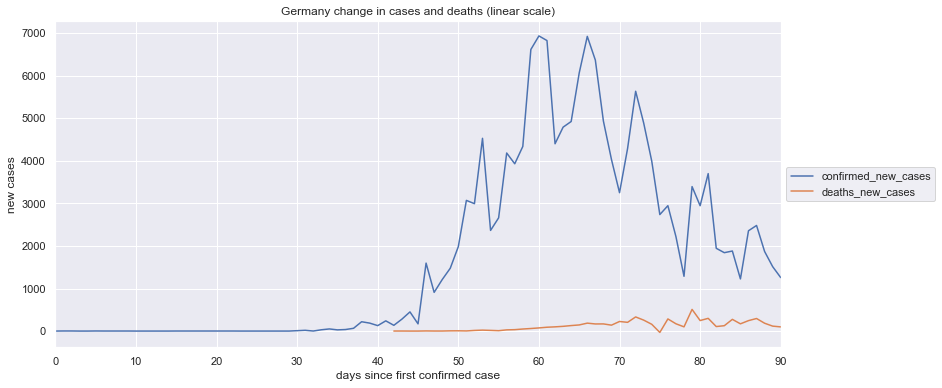

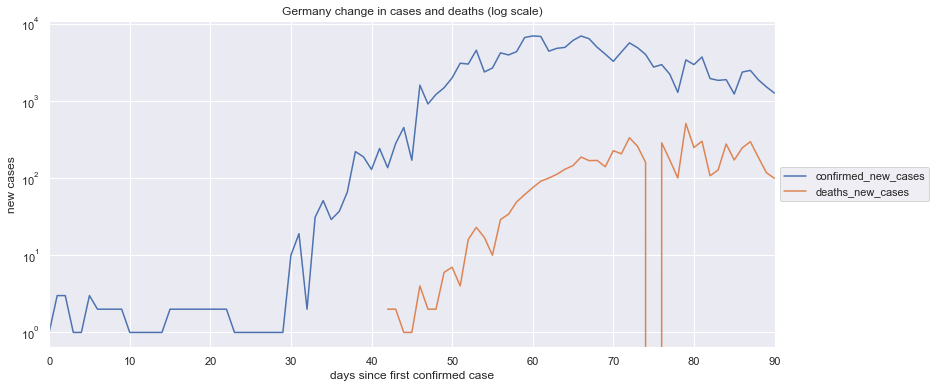

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
82     187327   25085       NaN                     1.831950   
83     189973   25549       NaN                     1.412503   
84     192994   25969       NaN                     1.590226   
85     195351   26384       NaN                     1.221281   
86     197675   26644       NaN                     1.189653   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
82                                       50852.256460                 
83                                       39209.030866                 
84                                       44142.354111                 
85                                       33900.993144                 
86                                       33023.046124                 

    deaths_percentage_change  \
82                  1.772963   
83                  1.849711   
84                  1.643900   
85                  1.598059   
86                  0.985446   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
82                                       49214.876292           
83                                       51345.279383           
84                                       45632.265451           
85                                       44359.793568           
86                                       27354.536209           

    confirmed_new_cases  deaths_new_cases  
82               3370.0             437.0  
83               2646.0             464.0  
84               3021.0             420.0  
85               2357.0             415.0  
86               2324.0             260.0

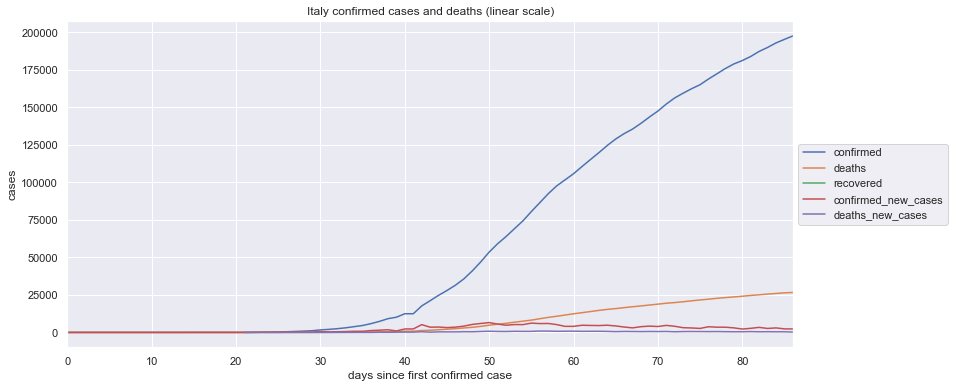

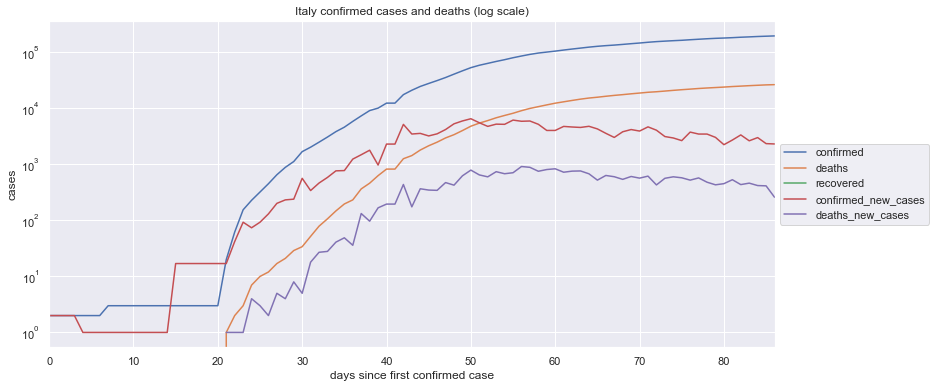

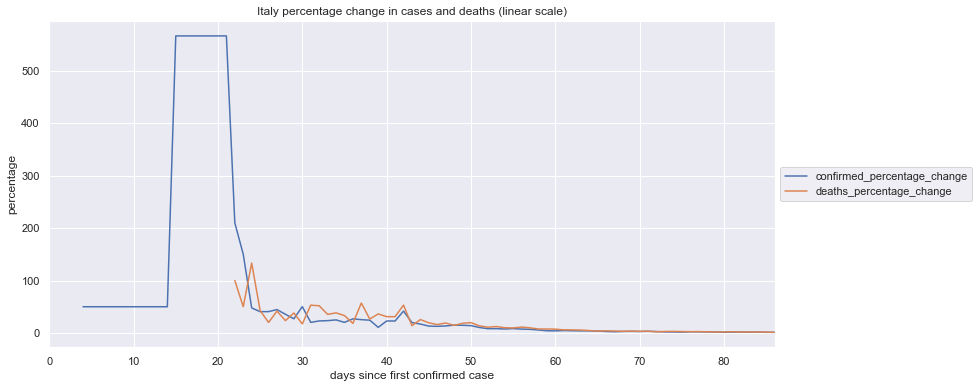

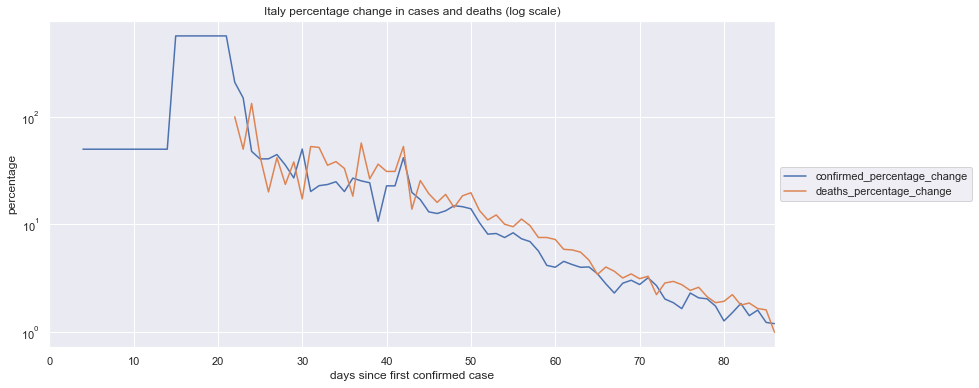

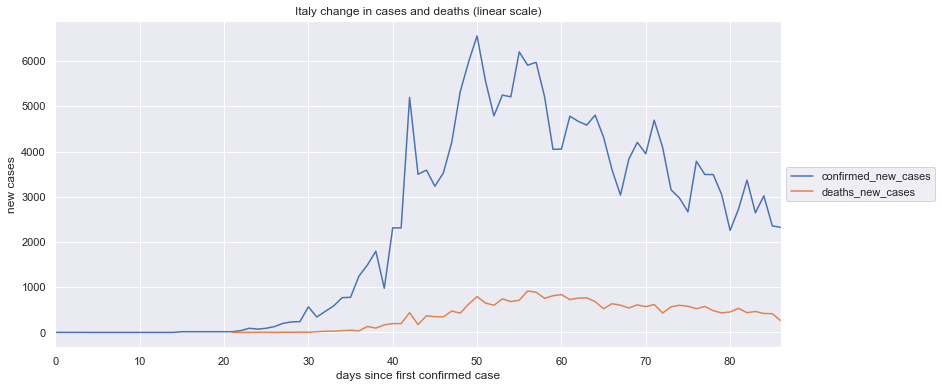

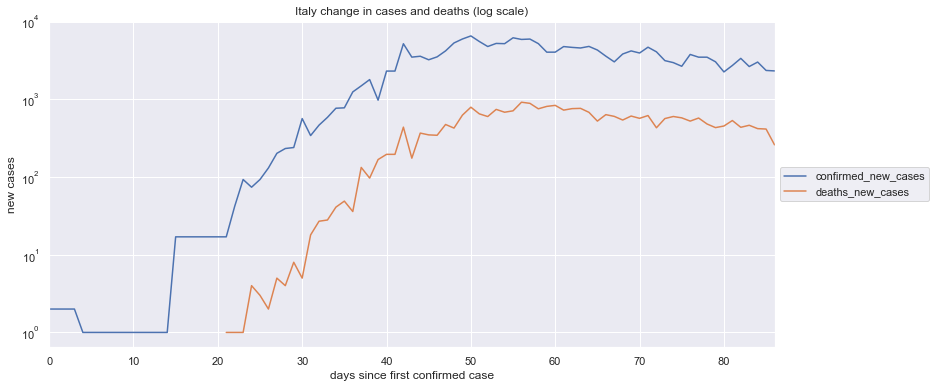

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
91     840351   46622       NaN                     3.508711   
92     869170   49954       NaN                     3.429400   
93     905358   51949       NaN                     4.163512   
94     938154   53755       NaN                     3.622434   
95     965785   54881       NaN                     2.945252   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
91                                      301458.598999                 
92                                      294644.413639                 
93                                      357717.246657                 
94                                      311229.360147                 
95                                      253047.758033                 

    deaths_percentage_change  \
91                  4.900549   
92                  7.146841   
93                  3.993674   
94                  3.476487   
95                  2.094689   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
91                                      421041.362234           
92                                      614036.402119           
93                                      343125.232558           
94                                      298689.929005           
95                                      179969.765158           

    confirmed_new_cases  deaths_new_cases  
91              28486.0            2178.0  
92              28819.0            3332.0  
93              36188.0            1995.0  
94              32796.0            1806.0  
95              27631.0            1126.0

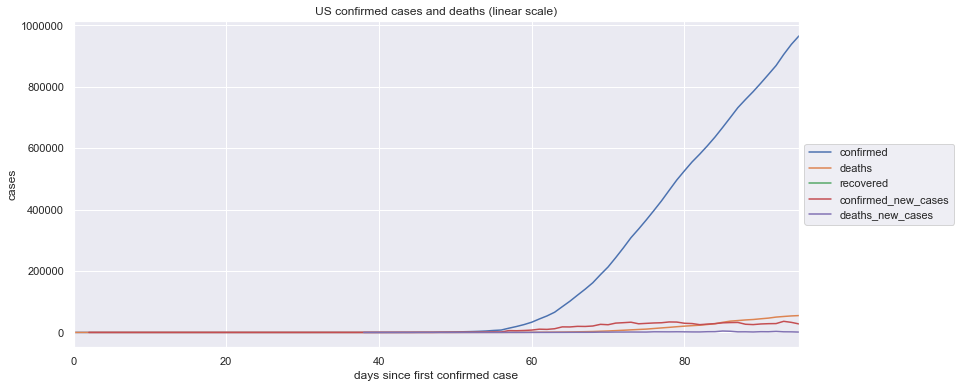

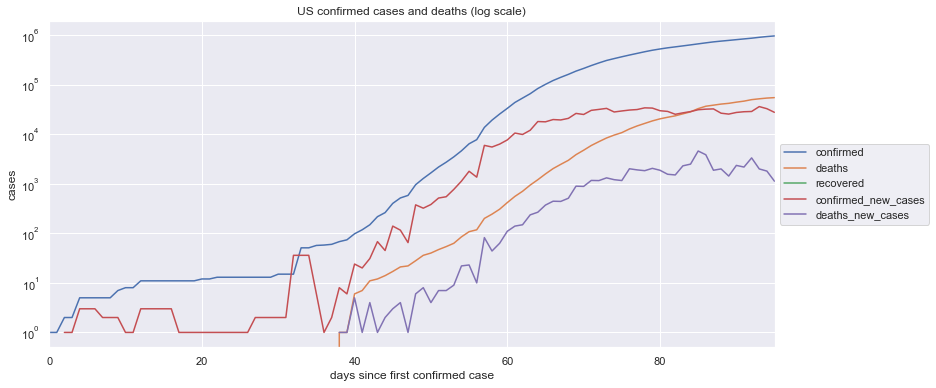

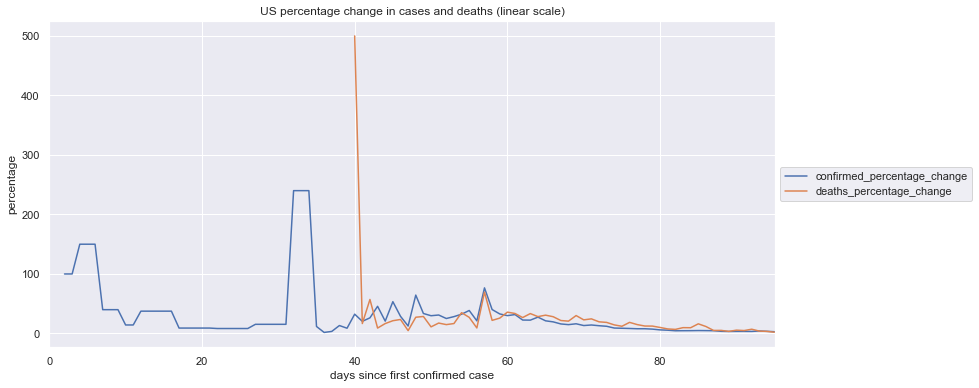

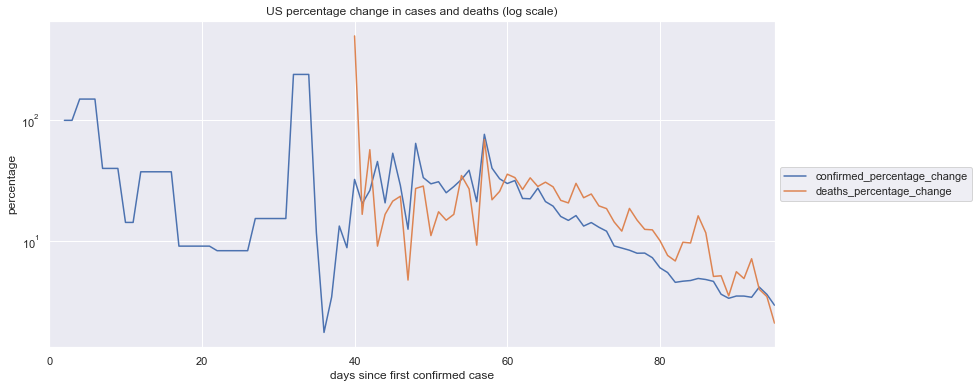

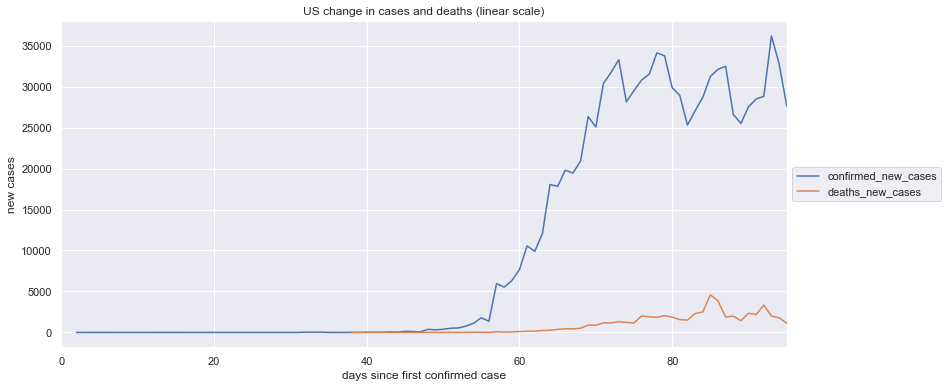

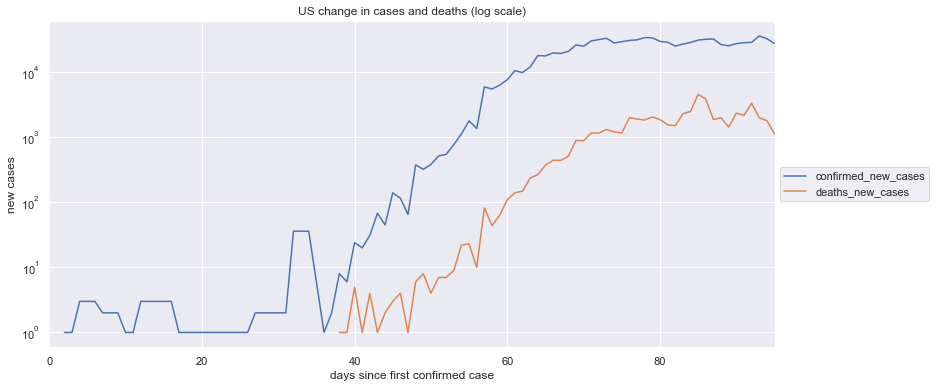

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
91                  10694                 238                   NaN   
92                  10708                 240                   NaN   
93                  10718                 240                   NaN   
94                  10728                 242                   NaN   
95                  10738                 243                   NaN   

    confirmed_percentage_change_South_Korea  \
91                                 0.102967   
92                                 0.130915   
93                                 0.093388   
94                                 0.093301   
95                                 0.093214   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
91                                         283.943678                             
92                                         361.011139                             
93                                         257.527958                             
94                                         257.287682                             
95                                         257.047854                             

    deaths_percentage_change_South_Korea  \
91                              0.421941   
92                              0.840336   
93                              0.840336   
94                              0.833333   
95                              0.413223   

    deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
91                                        1163.548259                       
92                                        2317.318803                       
93                                        2317.318803                       
94                                        2298.007812                       
95                                        1139.508006                       

    confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
91                             11.0                           1.0   
92                             14.0                           2.0   
93                             10.0                           2.0   
94                             10.0                           2.0   
95                             10.0                           1.0   

    confirmed_Sweden  deaths_Sweden recovered_Sweden  \
91               NaN            NaN              NaN   
92               NaN            NaN              NaN   
93               NaN            NaN              NaN   
94               NaN            NaN              NaN   
95               NaN            NaN              NaN   

    confirmed_percentage_change_Sweden  \
91                                 NaN   
92                                 NaN   
93                                 NaN   
94                                 NaN   
95                                 NaN   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
91                                                NaN                        
92                                                NaN                        
93                                                NaN                        
94                                                NaN                        
95                                                NaN                        

    deaths_percentage_change_Sweden  \
91                              NaN   
92                              NaN   
93                              NaN   
94                              NaN   
95                              NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
91                                                NaN                  
92                                                NaN                  
93                                                NaN                  
94                                                NaN                 

# comparisons: confirmed cases

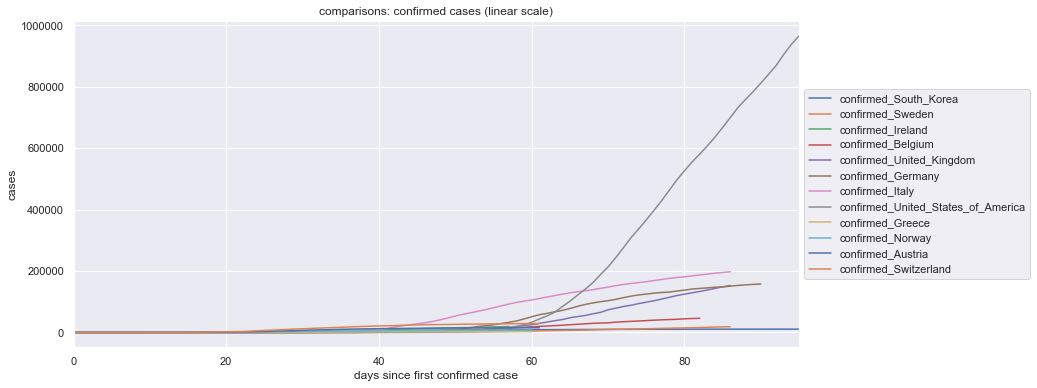

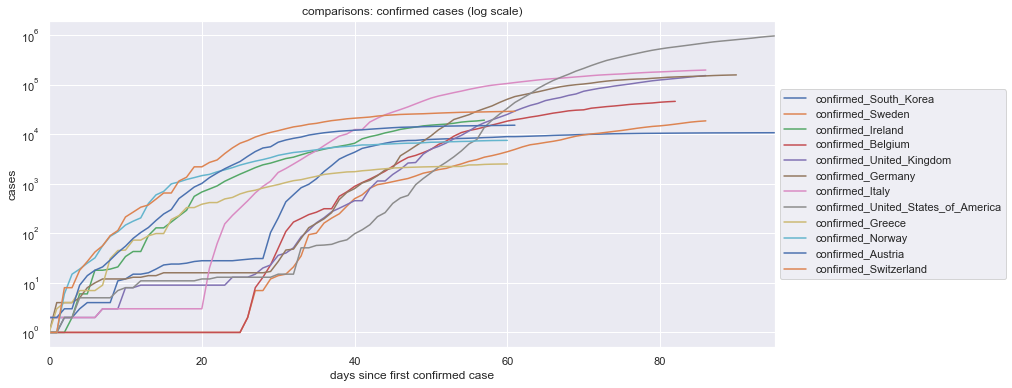

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

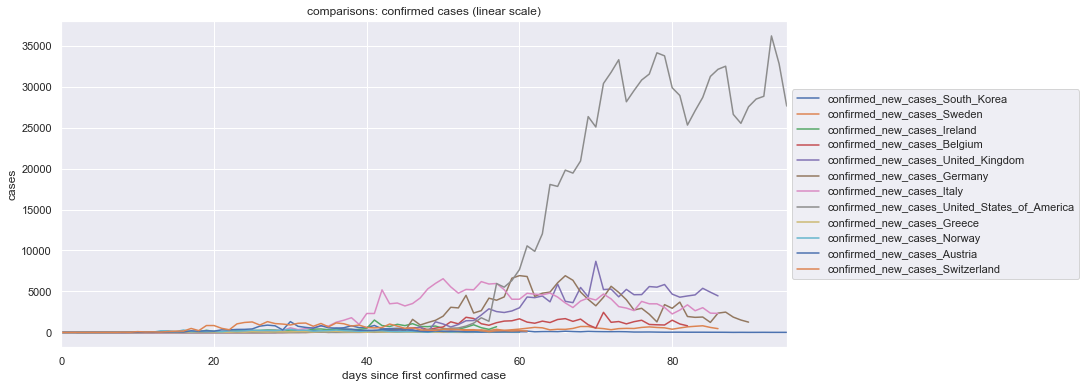

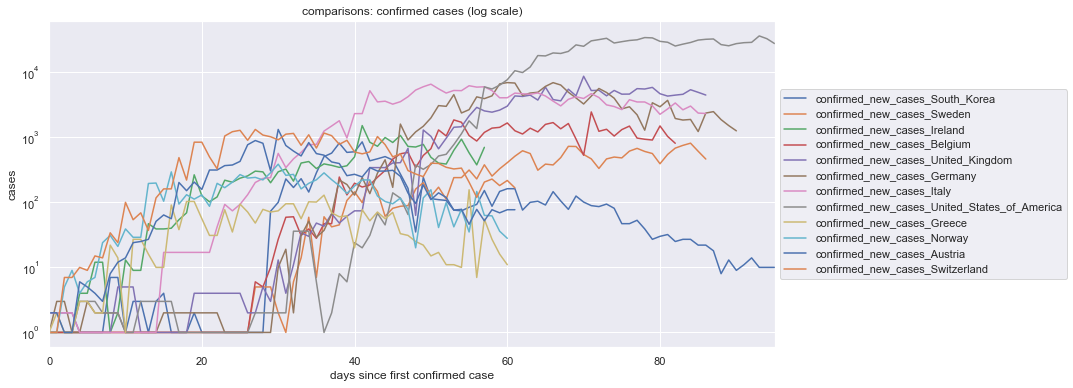

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

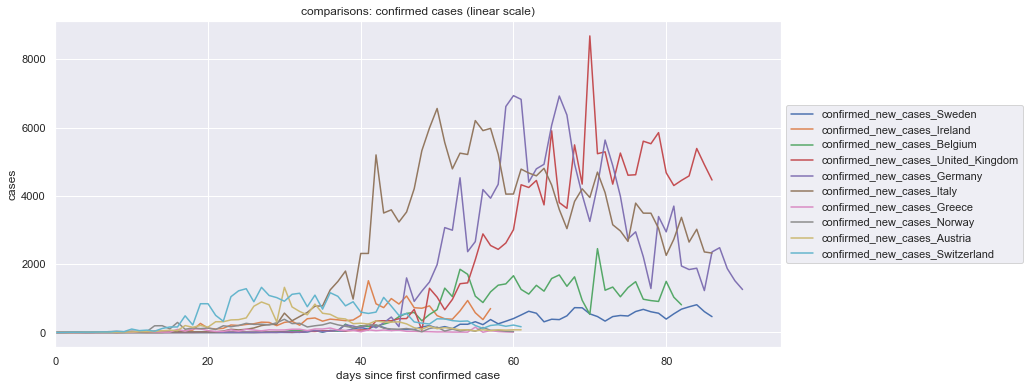

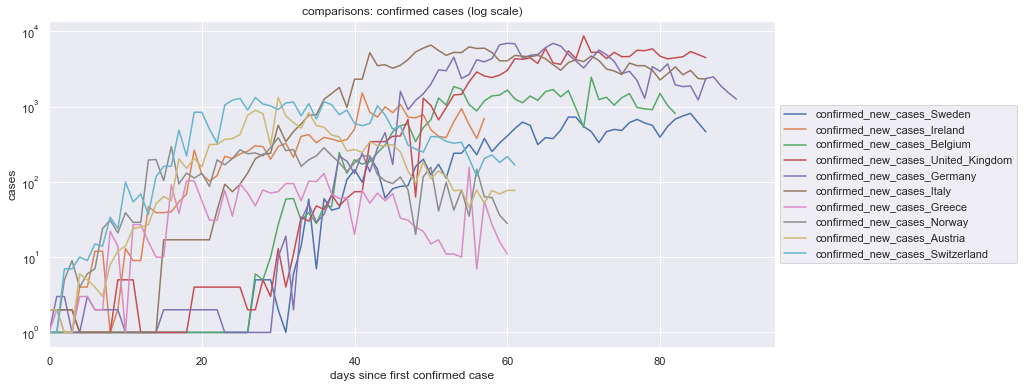

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
91                 238            NaN             NaN             NaN   
92                 240            NaN             NaN             NaN   
93                 240            NaN             NaN             NaN   
94                 242            NaN             NaN             NaN   
95                 243            NaN             NaN             NaN   

    deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
91                    NaN             NaN           NaN   
92                    NaN             NaN           NaN   
93                    NaN             NaN           NaN   
94                    NaN             NaN           NaN   
95                    NaN             NaN           NaN   

    deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
91                            46622            NaN            NaN   
92                            49954            NaN            NaN   
93                            51949            NaN            NaN   
94                            53755            NaN            NaN   
95                            54881            NaN            NaN   

    deaths_Austria  deaths_Switzerland  
91             NaN                 NaN  
92             NaN                 NaN  
93             NaN                 NaN  
94             NaN                 NaN  
95             NaN                 NaN

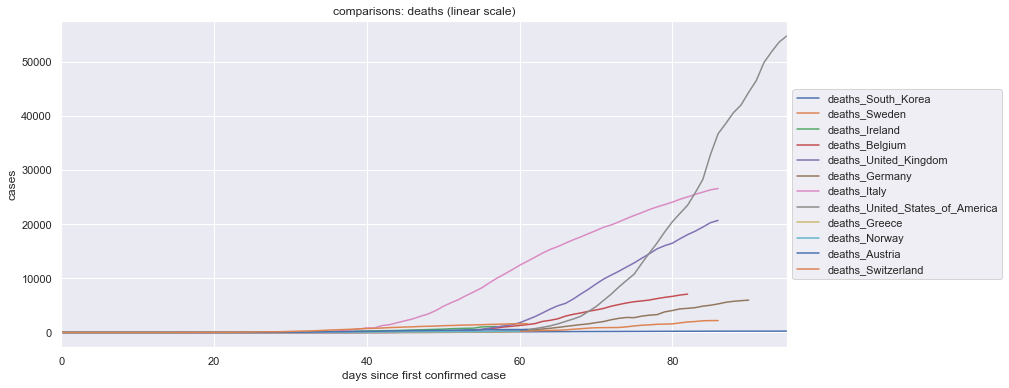

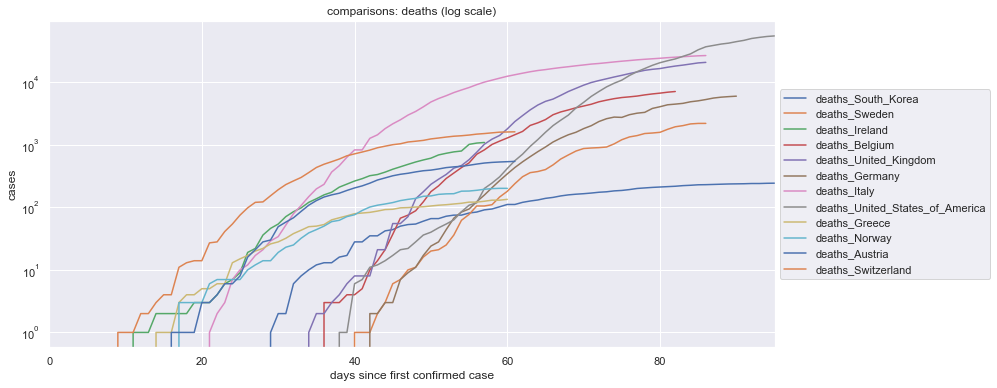

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
91            NaN             NaN             NaN                    NaN   
92            NaN             NaN             NaN                    NaN   
93            NaN             NaN             NaN                    NaN   
94            NaN             NaN             NaN                    NaN   
95            NaN             NaN             NaN                    NaN   

    deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
91             NaN           NaN            NaN            NaN   
92             NaN           NaN            NaN            NaN   
93             NaN           NaN            NaN            NaN   
94             NaN           NaN            NaN            NaN   
95             NaN           NaN            NaN            NaN   

    deaths_Austria  deaths_Switzerland  
91             NaN                 NaN  
92             NaN                 NaN  
93             NaN                 NaN  
94             NaN                 NaN  
95             NaN                 NaN

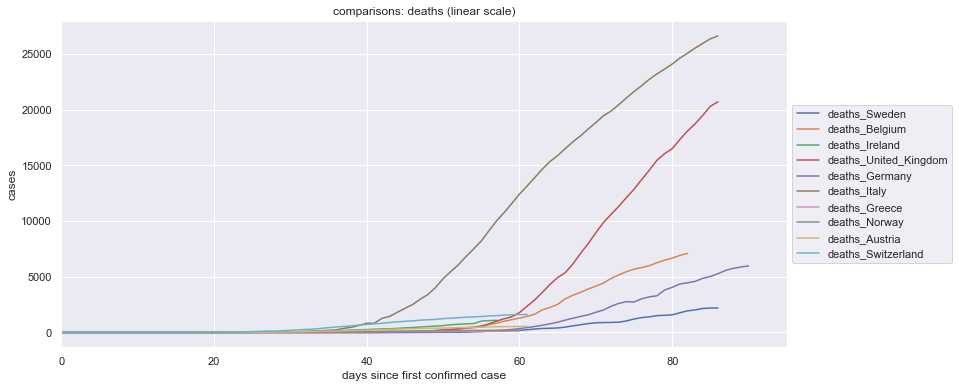

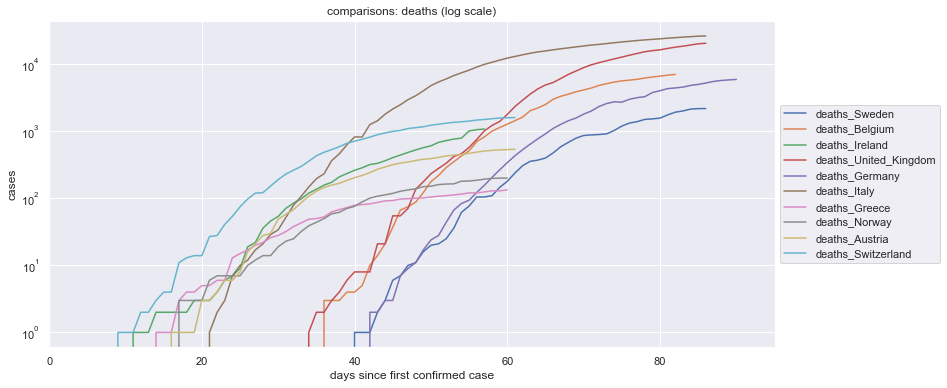

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
91                           1.0                      NaN   
92                           2.0                      NaN   
93                           2.0                      NaN   
94                           2.0                      NaN   
95                           1.0                      NaN   

    deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
91                       NaN                       NaN   
92                       NaN                       NaN   
93                       NaN                       NaN   
94                       NaN                       NaN   
95                       NaN                       NaN   

    deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
91                              NaN                       NaN   
92                              NaN                       NaN   
93                              NaN                       NaN   
94                              NaN                       NaN   
95                              NaN                       NaN   

    deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
91                     NaN                                     2178.0   
92                     NaN                                     3332.0   
93                     NaN                                     1995.0   
94                     NaN                                     1806.0   
95                     NaN                                     1126.0   

    deaths_new_cases_Greece  deaths_new_cases_Norway  \
91                      NaN                      NaN   
92                      NaN                      NaN   
93                      NaN                      NaN   
94                      NaN                      NaN   
95                      NaN                      NaN   

    deaths_new_cases_Austria  deaths_new_cases_Switzerland  
91                       NaN                           NaN  
92                       NaN                           NaN  
93                       NaN                           NaN  
94                       NaN                           NaN  
95                       NaN                           NaN

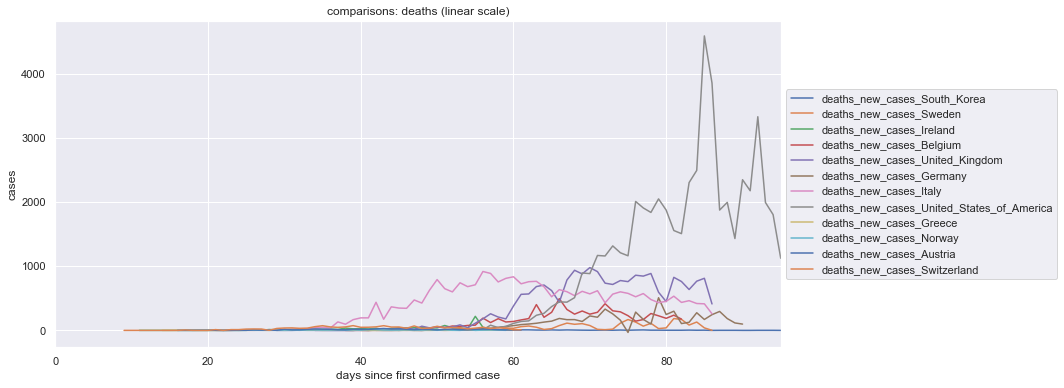

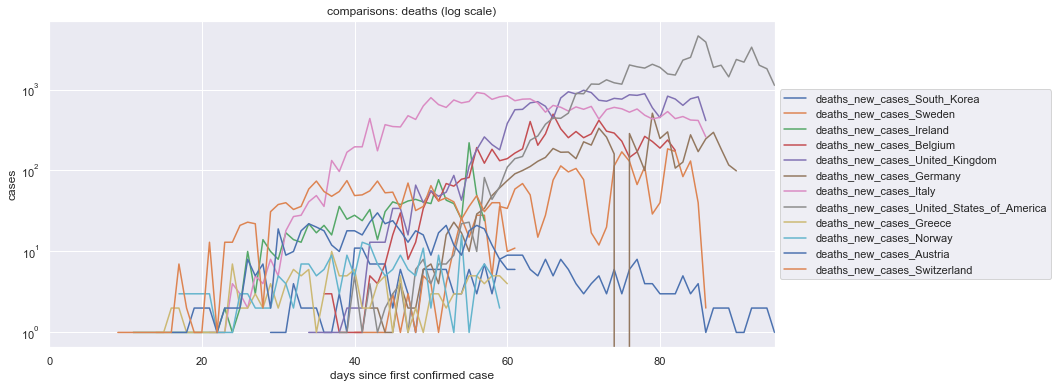

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
91                      NaN                       NaN   
92                      NaN                       NaN   
93                      NaN                       NaN   
94                      NaN                       NaN   
95                      NaN                       NaN   

    deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
91                       NaN                              NaN   
92                       NaN                              NaN   
93                       NaN                              NaN   
94                       NaN                              NaN   
95                       NaN                              NaN   

    deaths_new_cases_Germany  deaths_new_cases_Italy  deaths_new_cases_Greece  \
91                       NaN                     NaN                      NaN   
92                       NaN                     NaN                      NaN   
93                       NaN                     NaN                      NaN   
94                       NaN                     NaN                      NaN   
95                       NaN                     NaN                      NaN   

    deaths_new_cases_Norway  deaths_new_cases_Austria  \
91                      NaN                       NaN   
92                      NaN                       NaN   
93                      NaN                       NaN   
94                      NaN                       NaN   
95                      NaN                       NaN   

    deaths_new_cases_Switzerland  
91                           NaN  
92                           NaN  
93                           NaN  
94                           NaN  
95                           NaN

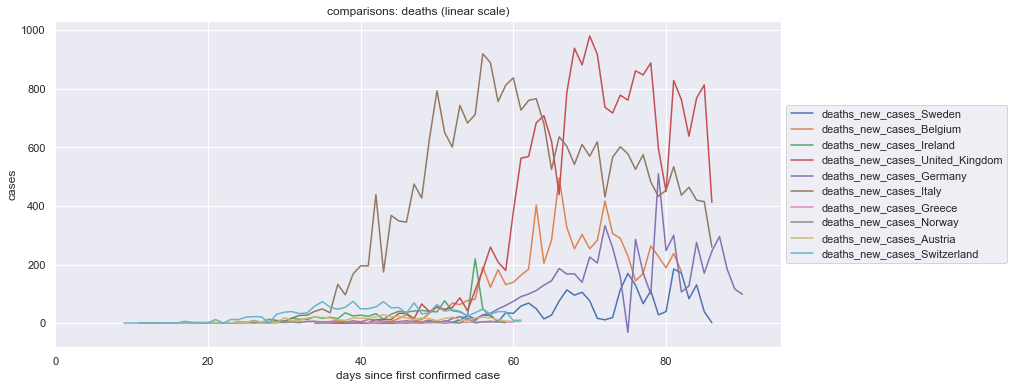

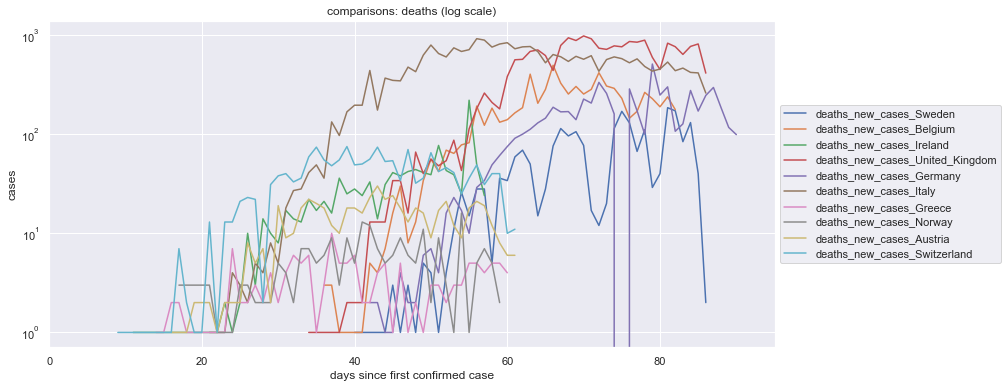

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
91                                 0.102967   
92                                 0.130915   
93                                 0.093388   
94                                 0.093301   
95                                 0.093214   

    confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
91                                 NaN                                  NaN   
92                                 NaN                                  NaN   
93                                 NaN                                  NaN   
94                                 NaN                                  NaN   
95                                 NaN                                  NaN   

    confirmed_percentage_change_Belgium  \
91                                  NaN   
92                                  NaN   
93                                  NaN   
94                                  NaN   
95                                  NaN   

    confirmed_percentage_change_United_Kingdom  \
91                                         NaN   
92                                         NaN   
93                                         NaN   
94                                         NaN   
95                                         NaN   

    confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
91                                  NaN                                NaN   
92                                  NaN                                NaN   
93                                  NaN                                NaN   
94                                  NaN                                NaN   
95                                  NaN                                NaN   

    confirmed_percentage_change_United_States_of_America  \
91                                           3.508711      
92                                           3.429400      
93                                           4.163512      
94                                           3.622434      
95                                           2.945252      

    confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
91                                 NaN                                 NaN   
92                                 NaN                                 NaN   
93                                 NaN                                 NaN   
94                                 NaN                                 NaN   
95                                 NaN                                 NaN   

    confirmed_percentage_change_Austria  \
91                                  NaN   
92                                  NaN   
93                                  NaN   
94                                  NaN   
95                                  NaN   

    confirmed_percentage_change_Switzerland  
91                                      NaN  
92                                      NaN  
93                                      NaN  
94                                      NaN  
95                                      NaN

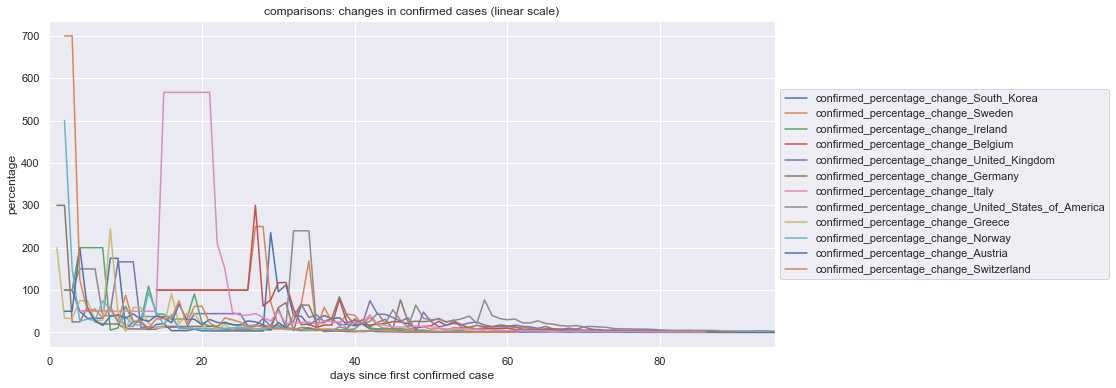

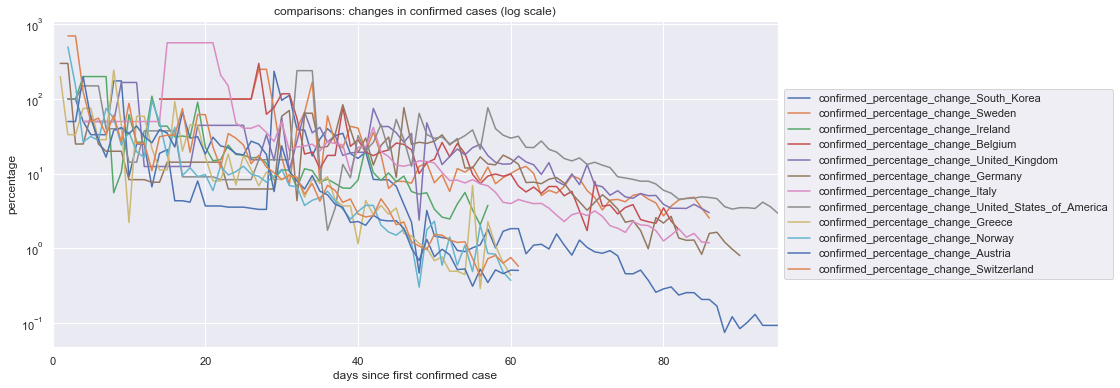

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
91                              0.421941                              NaN   
92                              0.840336                              NaN   
93                              0.840336                              NaN   
94                              0.833333                              NaN   
95                              0.413223                              NaN   

    deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
91                               NaN                               NaN   
92                               NaN                               NaN   
93                               NaN                               NaN   
94                               NaN                               NaN   
95                               NaN                               NaN   

    deaths_percentage_change_United_Kingdom  deaths_percentage_change_Germany  \
91                                      NaN                               NaN   
92                                      NaN                               NaN   
93                                      NaN                               NaN   
94                                      NaN                               NaN   
95                                      NaN                               NaN   

    deaths_percentage_change_Italy  \
91                             NaN   
92                             NaN   
93                             NaN   
94                             NaN   
95                             NaN   

    deaths_percentage_change_United_States_of_America  \
91                                           4.900549   
92                                           7.146841   
93                                           3.993674   
94                                           3.476487   
95                                           2.094689   

    deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
91                              NaN                              NaN   
92                              NaN                              NaN   
93                              NaN                              NaN   
94                              NaN                              NaN   
95                              NaN                              NaN   

    deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
91                               NaN                                   NaN  
92                               NaN                                   NaN  
93                               NaN                                   NaN  
94                               NaN                                   NaN  
95                               NaN                                   NaN

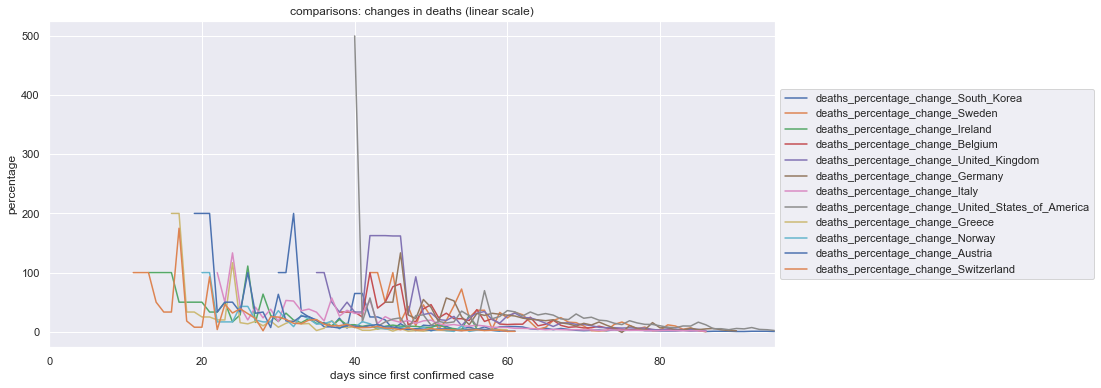

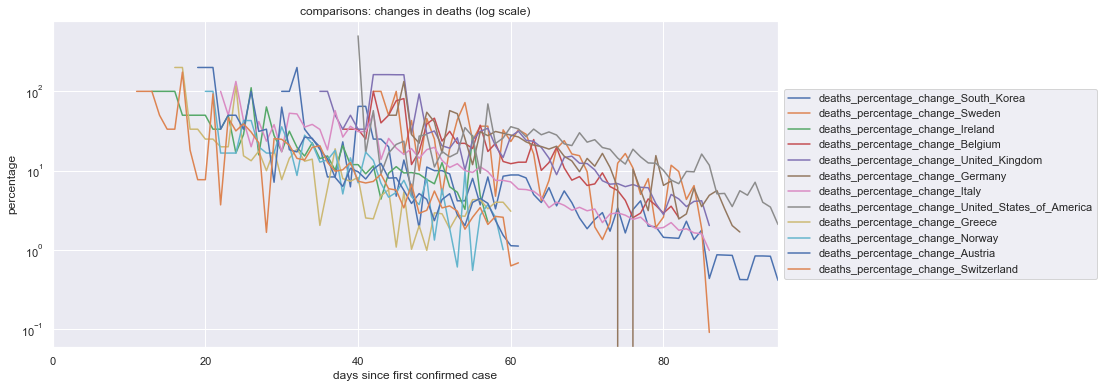

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
91                              NaN                               NaN   
92                              NaN                               NaN   
93                              NaN                               NaN   
94                              NaN                               NaN   
95                              NaN                               NaN   

    deaths_percentage_change_Ireland  deaths_percentage_change_United_Kingdom  \
91                               NaN                                      NaN   
92                               NaN                                      NaN   
93                               NaN                                      NaN   
94                               NaN                                      NaN   
95                               NaN                                      NaN   

    deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
91                               NaN                             NaN   
92                               NaN                             NaN   
93                               NaN                             NaN   
94                               NaN                             NaN   
95                               NaN                             NaN   

    deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
91                              NaN                              NaN   
92                              NaN                              NaN   
93                              NaN                              NaN   
94                              NaN                              NaN   
95                              NaN                              NaN   

    deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
91                               NaN                                   NaN  
92                               NaN                                   NaN  
93                               NaN                                   NaN  
94                               NaN                                   NaN  
95                               NaN                                   NaN

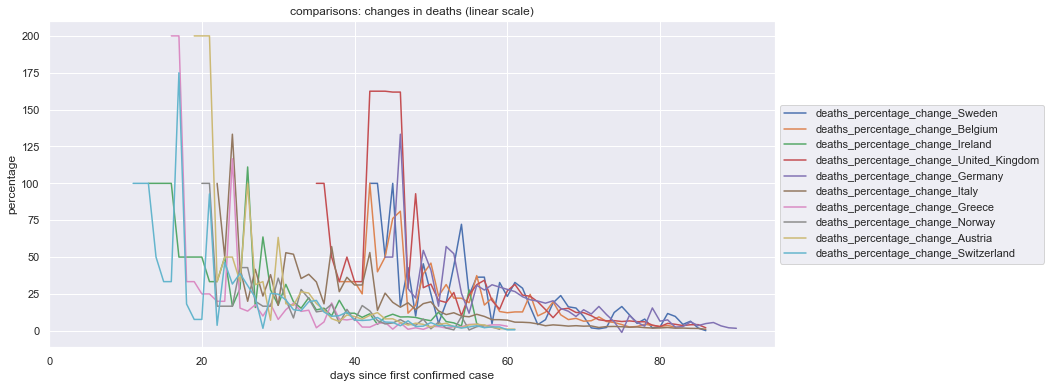

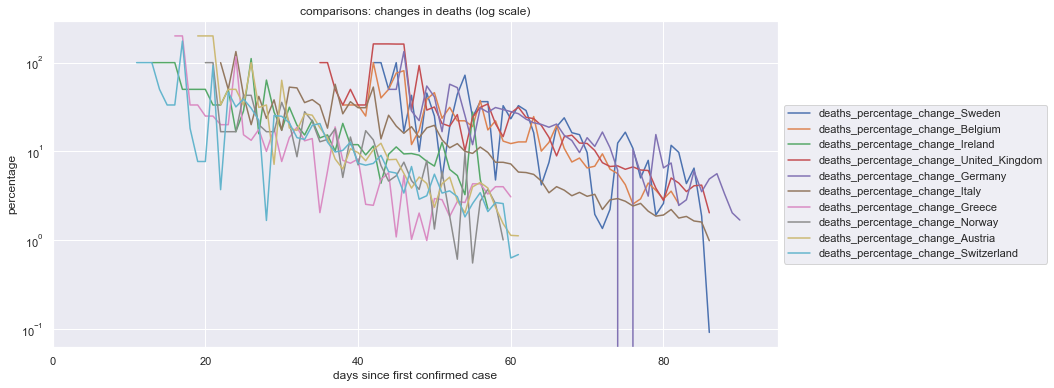

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');